# <h1 style="font-family: Sans-Serif; padding: 20px; font-size: 50px; color: #F20707; text-align: center; line-height: 2;"><b>PREDICTING MORTALITY IN HEART FAILURE PATIENTS</b>

<a id="1"></a>

## <b>1 <span style='color:#FF0000'>|</span> INTRODUCTION</b>

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:120%;
            text-align: left">

<h3 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center>Purpose of this notebook</center></h3>  

In this notebook, our goal is to observe many medical values ​​in the human body with the help of machine learning models to determine whether that person will have a heart attack in the future. For this, we will first analyze the probability of medical values ​​in the human body causing a heart attack.

# <h1 style="font-family: Sans-Serif; padding: 19px; font-size: 40px; color: #F20707; text-align: center; line-height: 1.9;"><b>Brief information about the variables in the dataset</b><br><span style = "color: #CD2DE0; font-size:25px"></span></h1>
<hr>

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:120%;
            text-align: left">

<h3 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center><span style = "color: #000000; background: yellow; font-size:25px">Means of the variables</span></center></h3>  
    
* **<mark>Anemia</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">anemia is a condition in which you lack enough healthy red blood cells to carry adequate oxygen to your body's tissues. Having anemia, also referred to as low hemoglobin, can make you feel tired and weak. (there is not anemia - 0, there is anemia - 1)</span>
    
* **<mark>Creatine_phosphokinase (CPK)</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">CPK is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)</span>
    
* **<mark>Ejection_fraction (EF)</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat. This indication of how well your heart is pumping out blood can help to diagnose and track heart failure. A normal heart’s ejection fraction may be between 50 and 70 percent.</span>
    
* **<mark>Platelets</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">platelets are colorless blood cells that help blood clot. Platelets stop bleeding by clumping and forming plugs in blood vessel injuries. Thrombocytopenia might occur as a result of a bone marrow disorder such as leukemia or an immune system problem. The normal number of platelets in the blood is 150,000 to 400,000 platelets per microliter (mcL) or 150 to 400 × 109/L.</span>
    
* **<mark>Serum_creatinine</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">The amount of creatinine in your blood should be relatively stable. An increased level of creatinine may be a sign of poor kidney function. Serum creatinine is reported as milligrams of creatinine to a deciliter of blood (mg/dL) or micromoles of creatinine to a liter of blood (micromoles/L). Here are the normal values by age: 0.9 to 1.3 mg/dL for adult males. 0.6 to 1.1 mg/dL for adult females. 0.5 to 1.0 mg/dL for children ages 3 to 18 years.</span>
    
* **<mark>Serum_sodium</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">Measurement of serum sodium is routine in assessing electrolyte, acid-base, and water balance, as well as renal function. Sodium accounts for approximately 95% of the osmotically active substances in the extracellular compartment, provided that the patient is not in renal failure or does not have severe hyperglycemia. The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L).</span>
    
* **<mark>Time</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">follow-up period (days)</span>
    
* **<mark>High_blood_pressure</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">(True - 1, False - 0)</span>
    
* **<mark>Age</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">between 40 - 95</span>
    
* **<mark>Diabetes</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">(True - 1, False - 0)</span>
    
* **<mark>Sex</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">(male - 1, female - 0)</span>
    
* **<mark>Smoking</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">(True - 1, False - 0)</span>
    
* **<mark>Death event</mark>** - <span style = "color: #ffffff; background: green; font-size:18px">(True - 1, False - 0)</span>

<a id="2"></a>

## <b>2<span style='color:#FF0000'>|</span> IMPORT NECESSARY LIBRARIES</b>

In [2]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from termcolor import colored
#!pip install xgboost
from xgboost import XGBRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)

sns.set_theme(style = "whitegrid")

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


<a id="3"></a>

## <b>3<span style='color:#FF0000'>|</span>LOAD DATASET</b>

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 104.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [4]:
heart = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df = heart.copy()
df.head(n=10).style.background_gradient(cmap="Reds_r").set_properties(**{"font-family": "Segoe UI"})


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1
5,90.000000,1,47,0,40,1,204000.000000,2.100000,132,1,1,8,1
6,75.000000,1,246,0,15,0,127000.000000,1.200000,137,1,0,10,1
7,60.000000,1,315,1,60,0,454000.000000,1.100000,131,1,1,10,1
8,65.000000,0,157,0,65,0,263358.030000,1.500000,138,0,0,10,1
9,80.000000,1,123,0,35,1,388000.000000,9.400000,133,1,1,10,1


<a id="4"></a>

## <b>4<span style='color:#FF0000'>|</span>INITIAL INFORMATION ABOUT DATASET</b>

<a id="4.1"></a>

#### <b>4.1 <span style='color:#F20707'>|</span> Get Initial Information</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    
The dataset consists of 299 rows and 13 columns. The data type of all variables are numeric.

<a id="4.2"></a>

#### <b>4.2 <span style='color:#F20707'>|</span> Change Column Values</b>

In [6]:
df_eda = pd.DataFrame()

df_eda["age"] = df["age"]
df_eda["anaemia"] = np.where(df["anaemia"] < 1, "no", "yes")
df_eda["creatinine_phosphokinase"] = df["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(df["diabetes"] < 1, "no", "yes")
df_eda["ejection_fraction"] = df["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(df["high_blood_pressure"] < 1, "no", "yes")
df_eda["platelets"] = df["platelets"]
df_eda["serum_creatinine"] = df["serum_creatinine"]
df_eda["serum_sodium"] = df["serum_sodium"]
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["time"] = df["time"]
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")


df_eda.head().style.background_gradient(cmap = "Reds").set_properties(**{"font-family" : "Segoe UI"})

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.000000,no,582,no,20,yes,265000.000000,1.900000,130,male,no,4,yes
1,55.000000,no,7861,no,38,no,263358.030000,1.100000,136,male,no,6,yes
2,65.000000,no,146,no,20,no,162000.000000,1.300000,129,male,yes,7,yes
3,50.000000,yes,111,no,20,no,210000.000000,1.900000,137,male,no,7,yes
4,65.000000,yes,160,yes,20,no,327000.000000,2.700000,116,female,no,8,yes


<a id="4.3"></a>

#### <b>4.3 <span style='color:#F20707'>|</span> Descriptive Statistics of Numeric Variables</b>

In [7]:
df_eda.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
time,299.000000,130.260870,77.614208,4.000000,73.000000,115.000000,203.000000,285.000000


<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Basic descriptive statistics</center></h4>  
    
* **The average value of age is <mark><b>60.83</b></mark>, the highest value is <mark><b>95</b></mark>**

* **The average value of creatinine_phosphokinase is <mark><b>581.83</b></mark>, the highest value is <mark><b>7861</b></mark>**

* **The average value of ejection_fraction is <mark><b>30.08</b></mark>, the highest value is <mark><b>80</b></mark>**

* **The average value of platelets is <mark><b>263358</b></mark>, the highest value is <mark><b>850000</b></mark>**

* **The average value of serum_creatinine is <mark><b>1.39</b></mark>, the highest value is <mark><b>9.4</b></mark>**

* **The average value of serum_sodium is <mark><b>136.62</b></mark>, the highest value is <mark><b>148</b></mark>**

* **The average value of time is <mark><b>130.26</b></mark>, the highest value is <mark><b>285</b></mark>**

<a id="4.4"></a>

#### <b>4.4 <span style='color:#F20707'>|</span> Check null Values</b>

In [8]:
df.isnull().any() #to check "null" values

,0
age,False
anaemia,False
creatinine_phosphokinase,False
diabetes,False
ejection_fraction,False
high_blood_pressure,False
platelets,False
serum_creatinine,False
serum_sodium,False
sex,False


<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    
There are not any null values in the dataset.

<a id="5"></a>

## <b>5<span style='color:#F20707'>|</span>DATA VISUALIZATION</b>

# <h1 style="font-family: Sans-Serif; padding: 19px; font-size: 40px; color: #F20707; text-align: center; line-height: 1.9;"><b>Data visualization and exploratory data analysis</b><br><span style = "color: #CD2DE0; font-size:25px"></span></h1>
<hr>

<a id="5.1"></a>

#### <b>5.1 <span style='color:#F20707'>|</span> Catplot and Barplot</b>

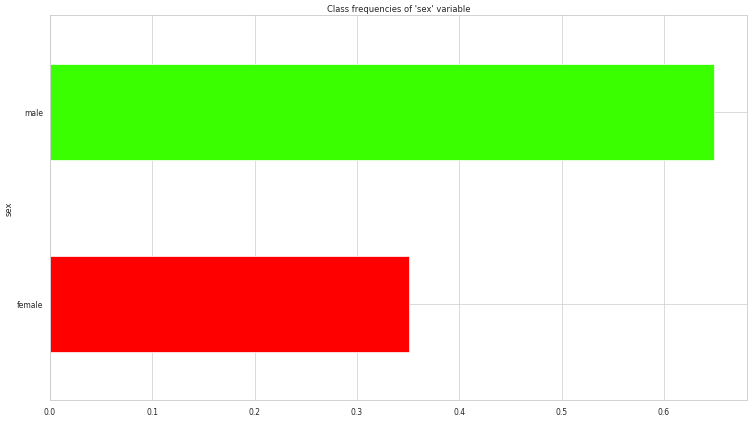

In [9]:
# To show the relationship between categoric variable "sex" and its frequency

plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

(df_eda["sex"].value_counts(ascending = True, normalize = True)
 .plot.barh(color= ["#FF0000", "#3AFF00"])
 .set_title("Class frequencies of 'sex' variable"));

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    
From this graph, it is clear that the number of men in the "sex" variable in the dataset is much more than the number of women.

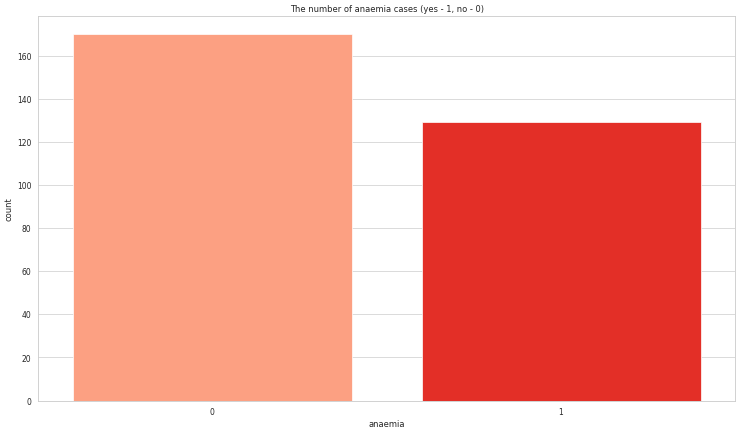

In [10]:
plt.figure(figsize=(18, 10), dpi=50, edgecolor="black")

sns.barplot(
    x=df["anaemia"].value_counts().index,
    y=df["anaemia"].value_counts(),
    palette="Reds",
    saturation=1
).set(title="The number of anaemia cases (yes - 1, no - 0)");

plt.show()

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    


It is clear from this graph that the presence of anemia is less than the absence.

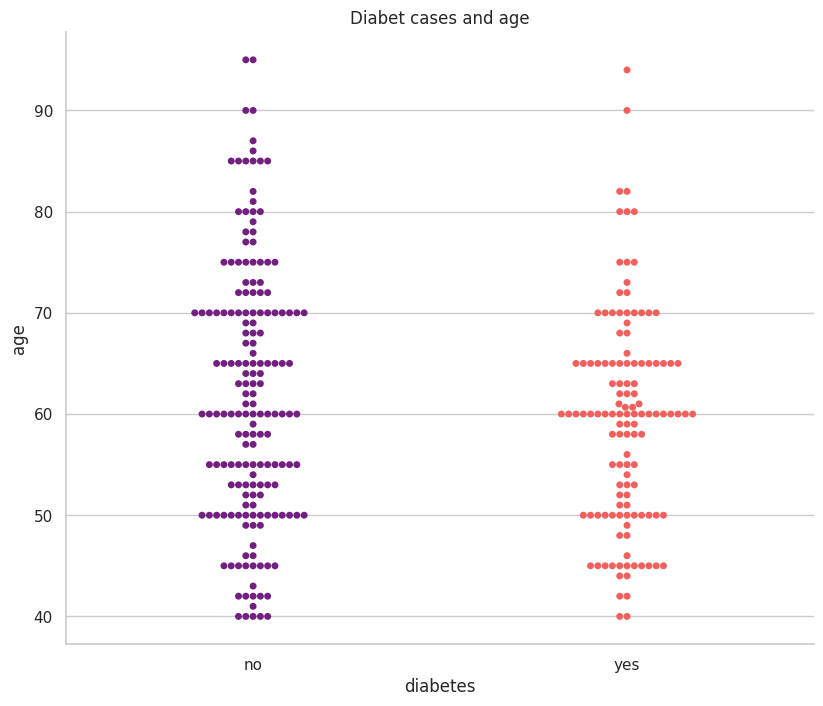

In [14]:
sns.catplot(x = "diabetes",
            y = "age",
            kind = "swarm",
            data = df_eda, height = 7, aspect = 1.2, palette = "magma",
            margin_titles = True).set(title = "Diabet cases and age");

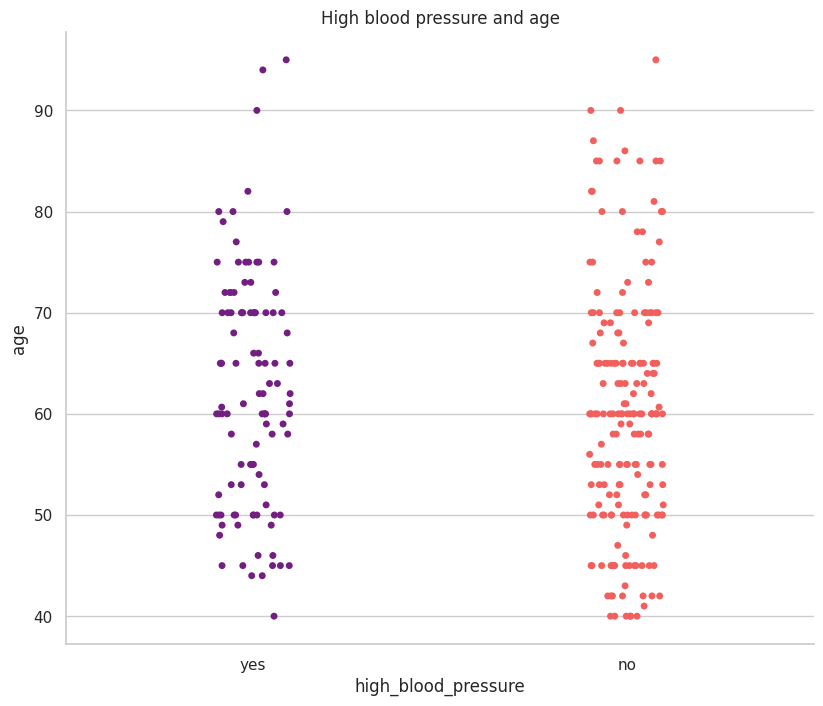

In [43]:
sns.catplot(x = "high_blood_pressure",
            y = "age",
            kind = "strip",
            data = df_eda, height = 7, aspect = 1.2, palette = "magma",
            margin_titles = True).set(title = "High blood pressure and age");

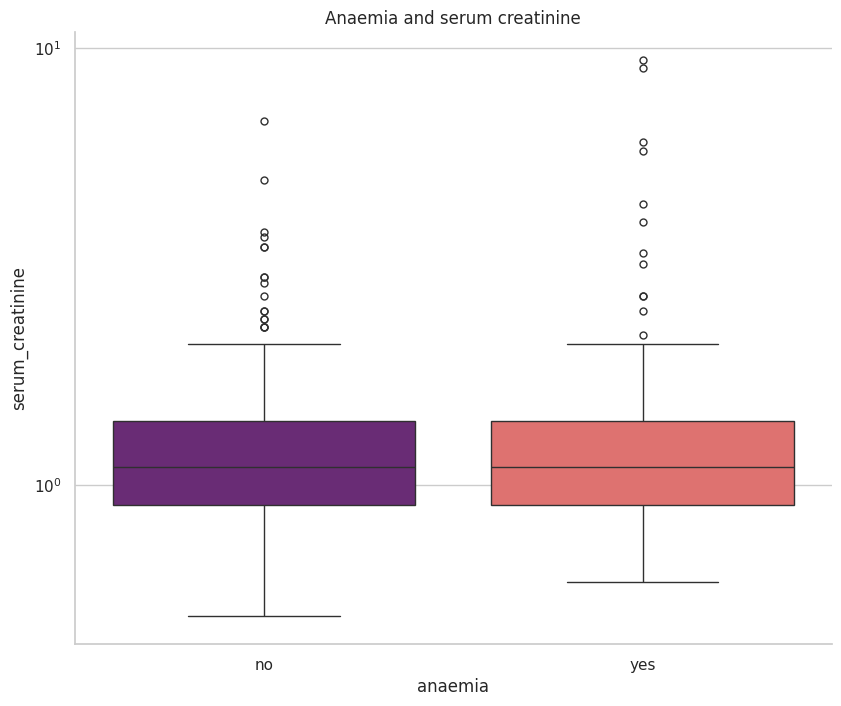

In [44]:
sns.catplot(x = "anaemia",
            y = "serum_creatinine",
            kind = "box",
            color = '#abc1ed', height = 7, aspect = 1.2, palette = "magma",
            data = df_eda).set(yscale="log").set(title = "Anaemia and serum creatinine");

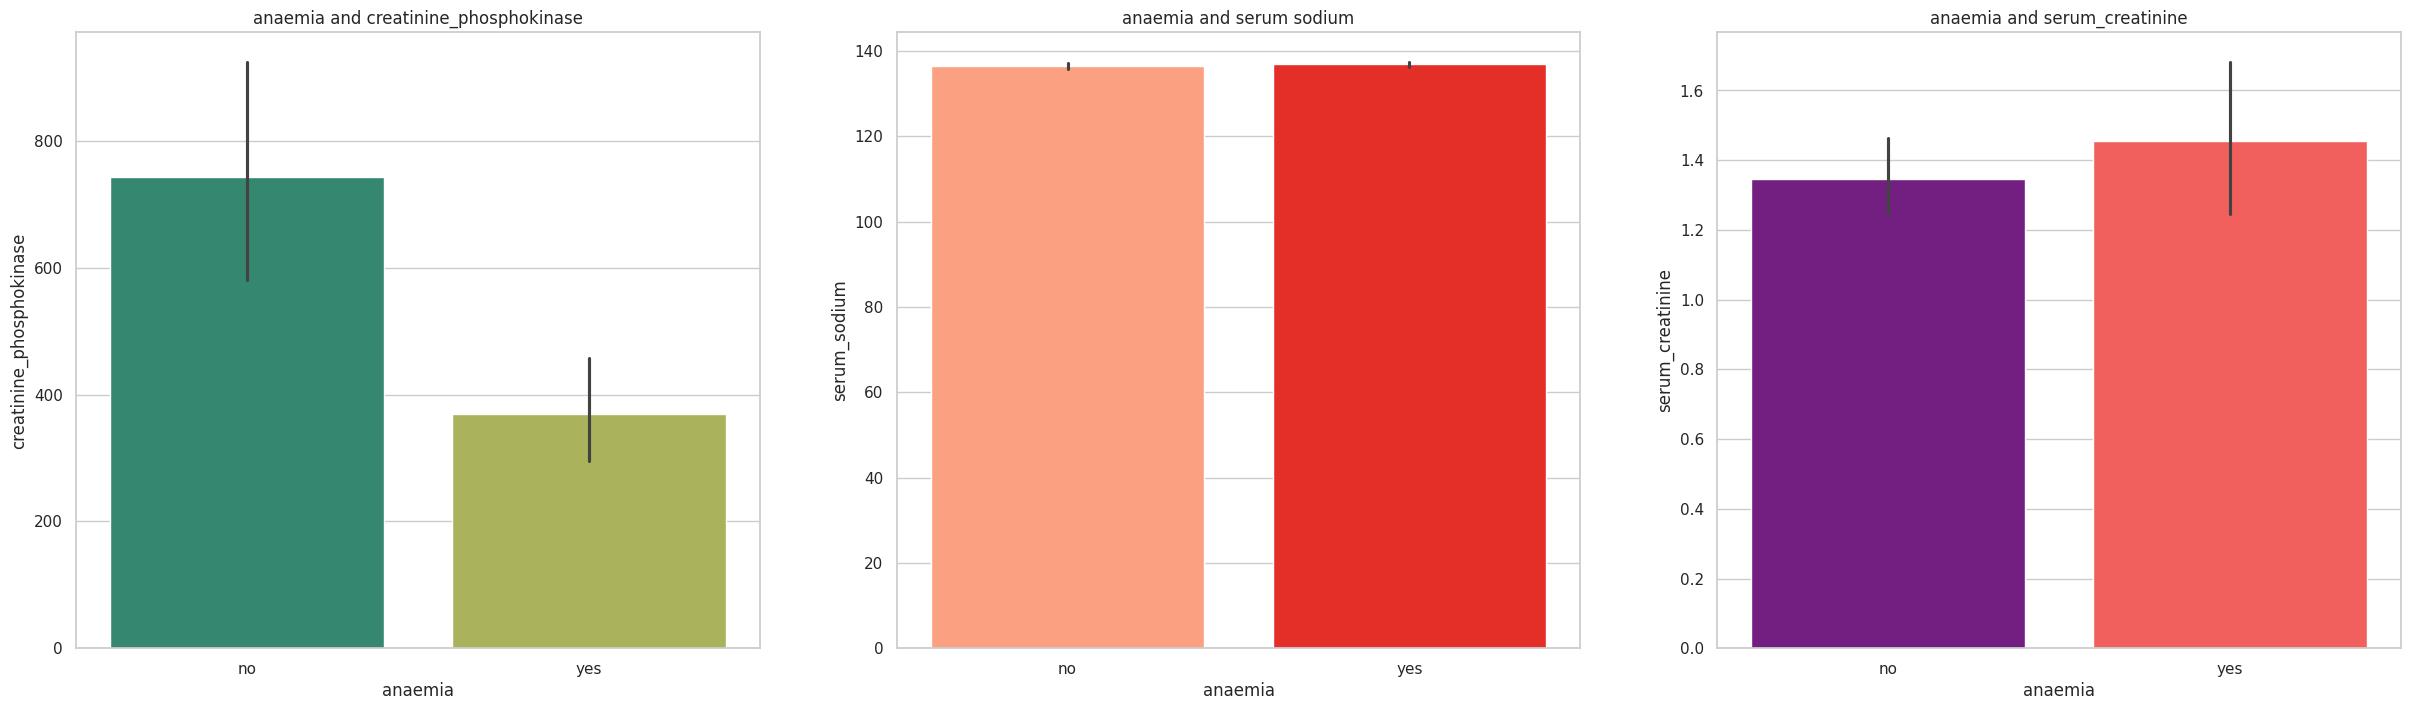

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle("")

sns.barplot(ax = axes[0],
            x = "anaemia",
            y = "creatinine_phosphokinase",
            data = df_eda, palette = "gist_earth",
            saturation = 1)
axes[0].set_title("anaemia and creatinine_phosphokinase")

sns.barplot(ax = axes[1],
            x = "anaemia",
            y = "serum_sodium",
            data = df_eda, palette = "Reds",
            saturation = 1)
axes[1].set_title("anaemia and serum sodium")

sns.barplot(ax = axes[2],
            x = "anaemia",
            y = "serum_creatinine",
            data = df_eda, palette = "magma",
            saturation = 1)
axes[2].set_title("anaemia and serum_creatinine");

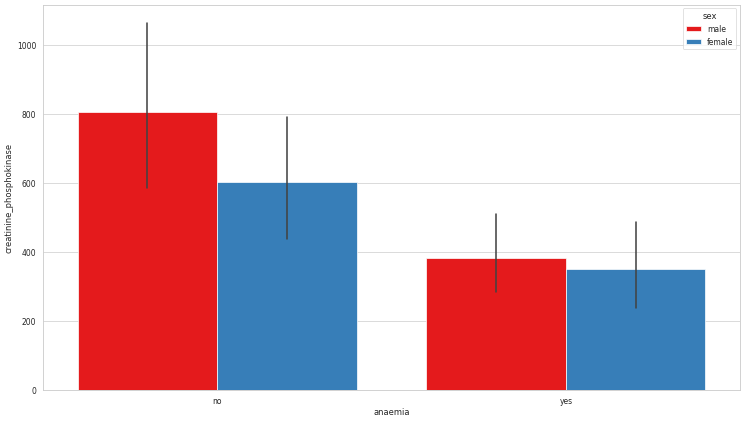

In [46]:
plt.figure(figsize = (18, 10), dpi = 50)

sns.barplot(x = "anaemia", y = "creatinine_phosphokinase", hue = "sex",
            data = df_eda, palette = "Set1", saturation = 1);

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    


From the graphs above, we can observe the relationships between various categorical and numerical variables.


<a id="5.2"></a>

#### <b>5.2 <span style='color:#F20707'>|</span>Distplot</b>

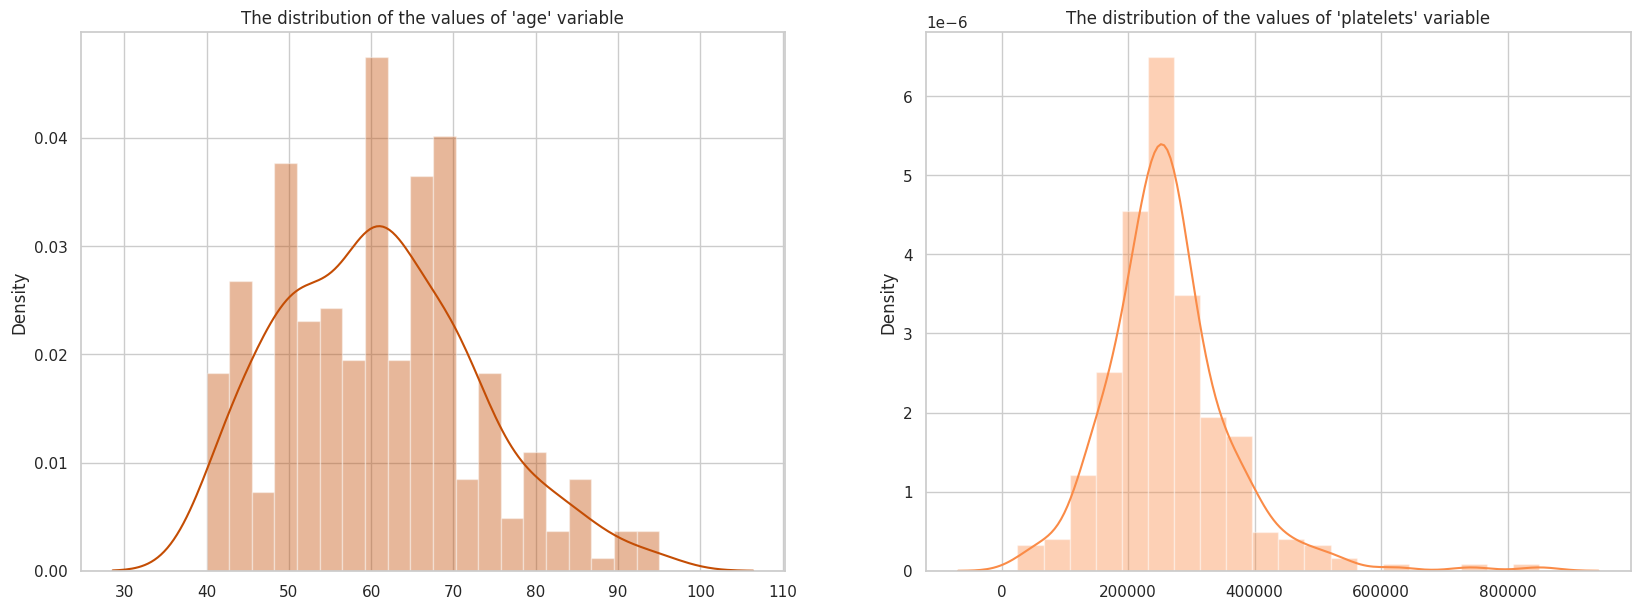

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.distplot(ax = axes[0], x = df_eda["age"],
             hist = True,
             bins = 20,
             kde = True,
             vertical = False, color = "#C44D04").set(title = "The distribution of the values of 'age' variable");

sns.distplot(ax = axes[1], x = df_eda["platelets"],
             hist = True,
             bins = 20,
             kde = True,
             vertical = False, color = "#FA8B47").set(title = "The distribution of the values of 'platelets' variable");

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Chart report</center></h4>  
    


From the first graph, we can observe that the values of the "age" variablek are mostly distributed as valuesof 50, 60 and 65 - 70. In addition, there are many peaks in the distribution graph of the "age" variable. This is an indicator that the values of the variable are not normally distributed.Looking at the second graph, we can observe that the values of the "platelets" variable are mainly distributed between 200000 and 400000.At the same time, the graph does not have many peaks, skewness and kurtosis are low. It can be said that the values of this variable are normally distributed.

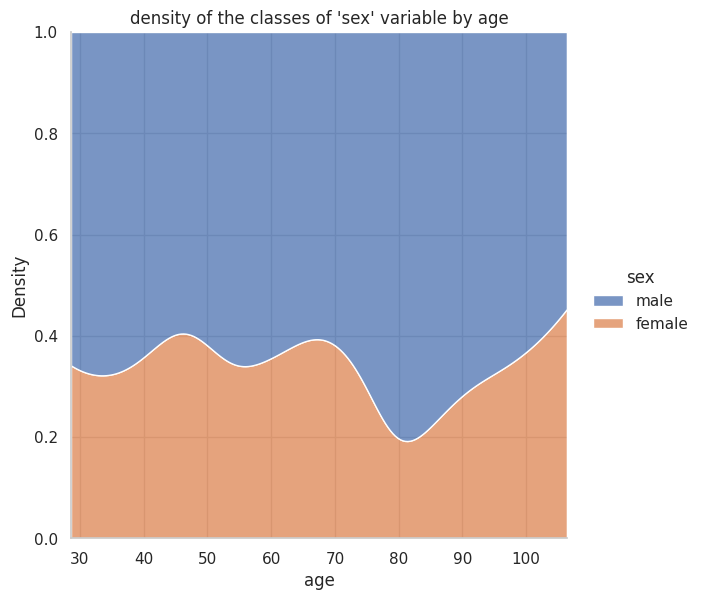

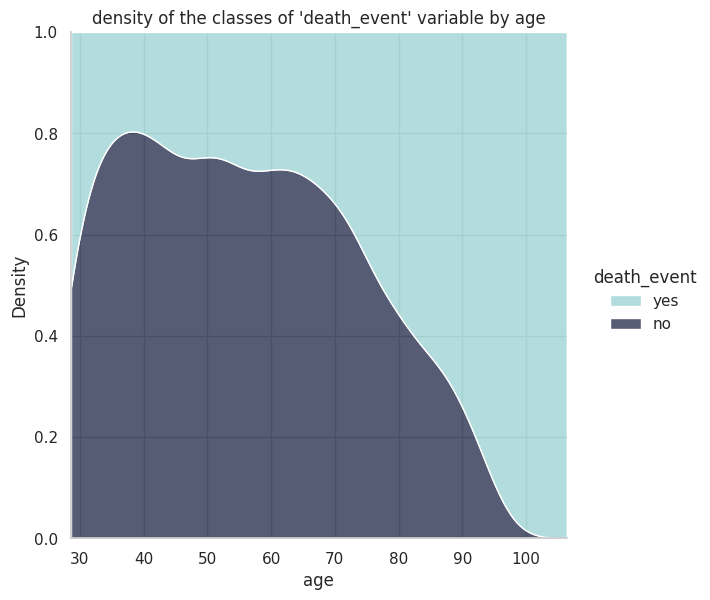

In [48]:
sns.displot(
    data = df_eda,
    x = "age", hue = "sex",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    color = "#FE6203",
).set(title = "density of the classes of 'sex' variable by age");


sns.displot(
    data = df_eda,
    x = "age", hue = "death_event",
    kind = "kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
).set(title = "density of the classes of 'death_event' variable by age");

<a id="5.3"></a>

#### <b>5.3 <span style='color:#F20707'>|</span>Boxplot</b>

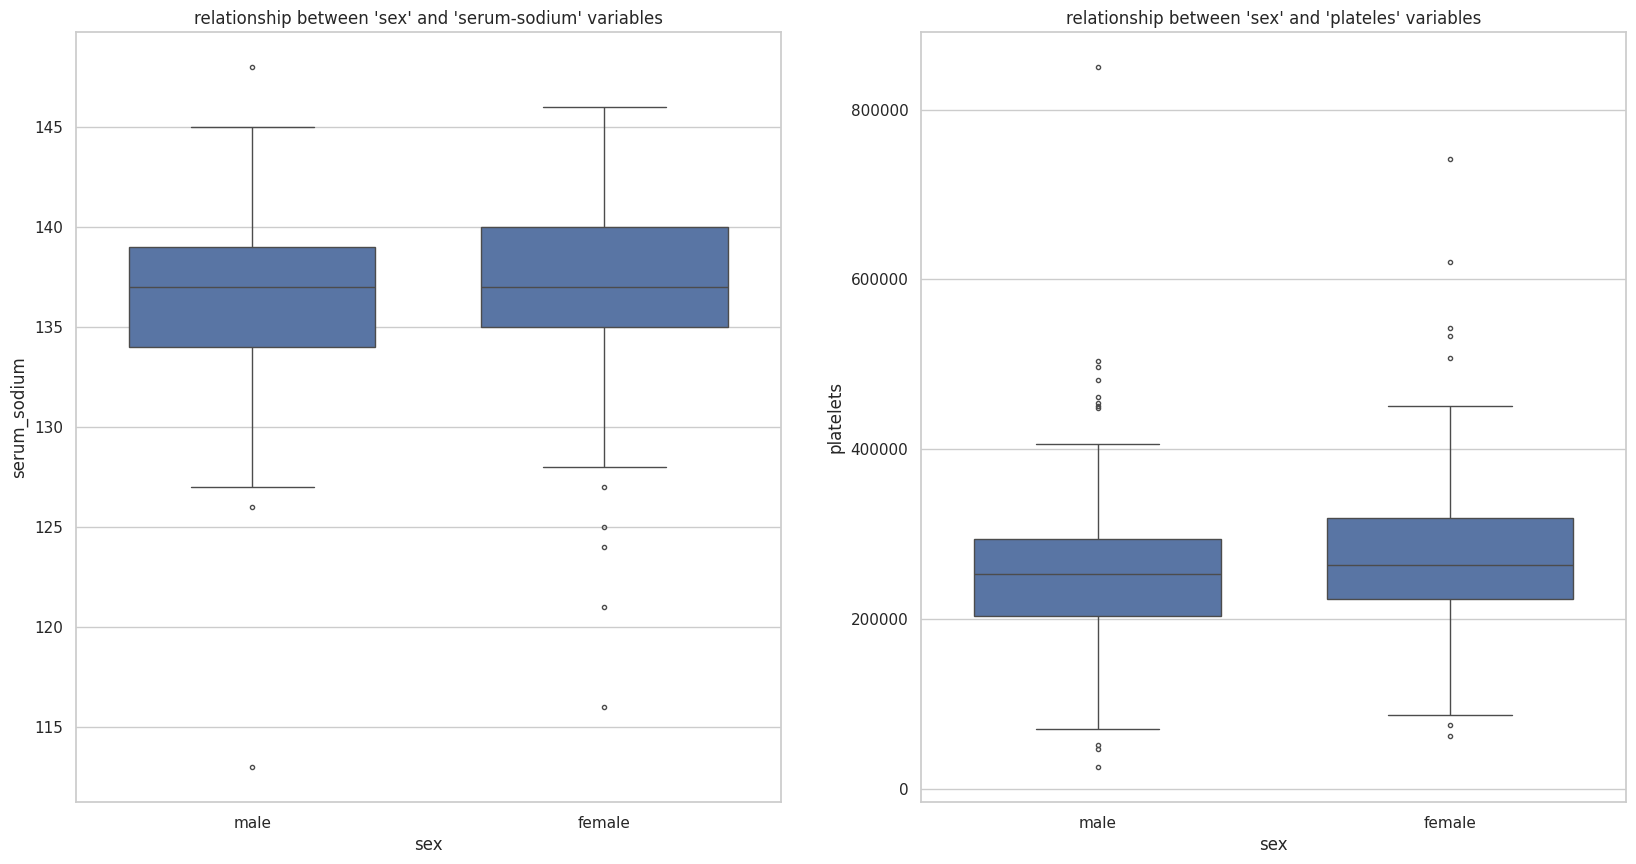

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))


sns.boxplot(ax = axes[0], x = "sex", y = "serum_sodium", data = df_eda, width = 0.7,
            orient = "v", fliersize = 3, linewidth = 1);
axes[0].set_title("relationship between 'sex' and 'serum-sodium' variables");

sns.boxplot(ax = axes[1], x = "sex", y = "platelets", data = df_eda, width = 0.7,
            orient = "v", fliersize = 3, linewidth = 1);
axes[1].set_title("relationship between 'sex' and 'plateles' variables");

<a id="5.4"></a>

#### <b>5.4 <span style='color:#FE6203'>|</span>Pairplot</b>

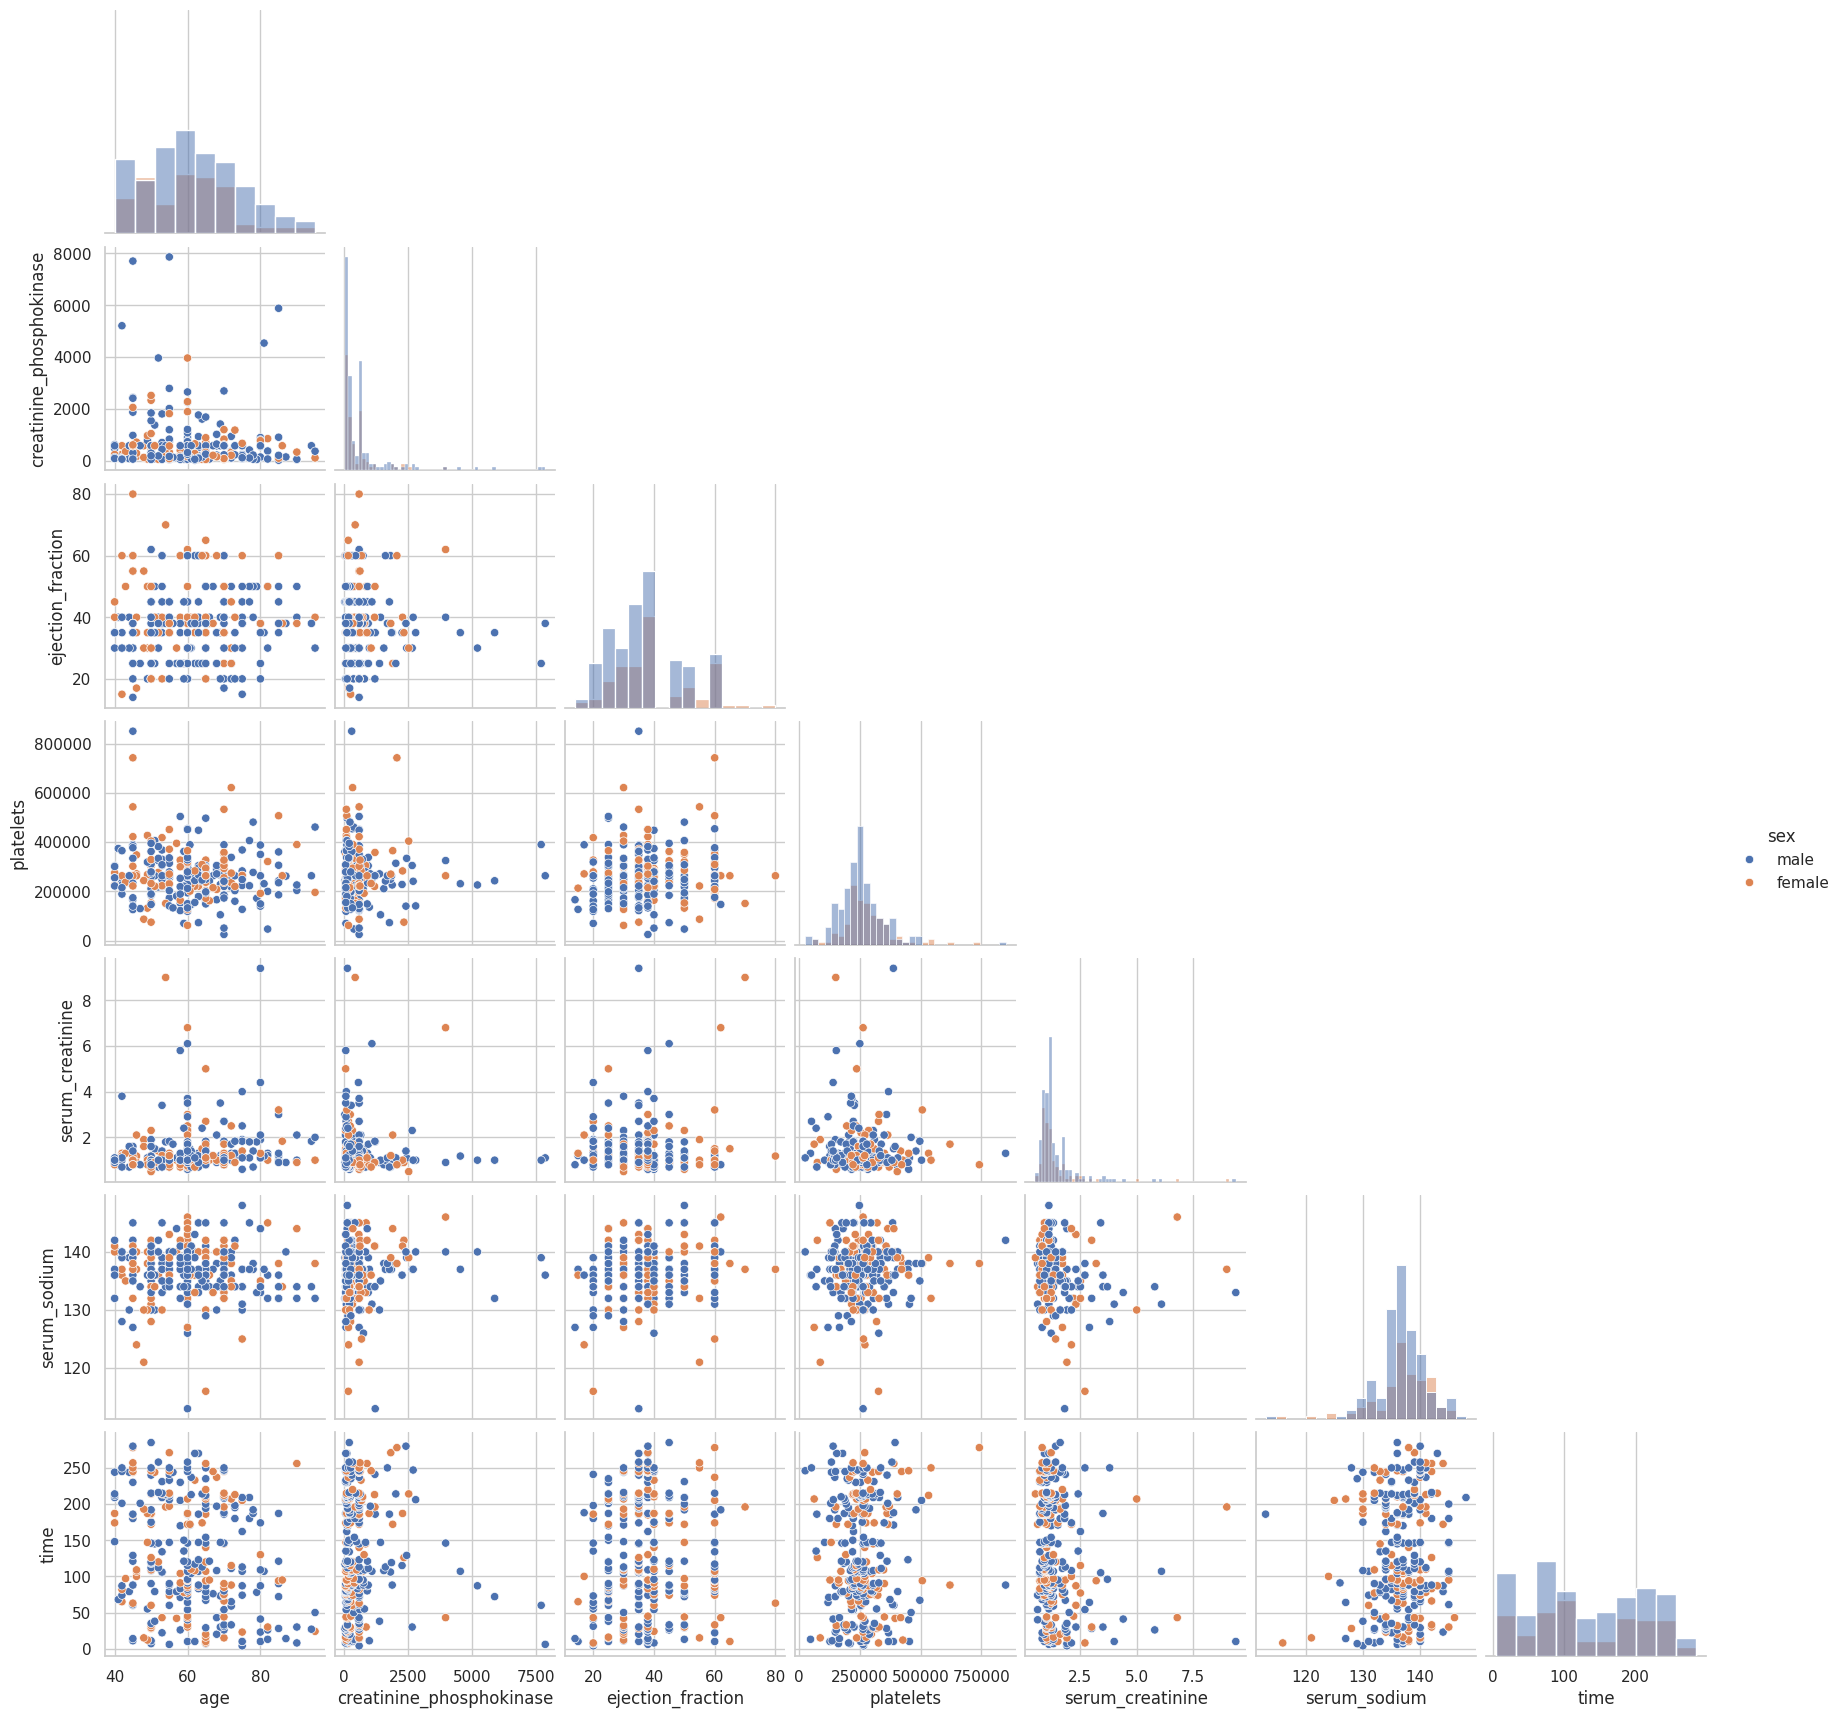

In [50]:
sns.pairplot(df_eda, hue = "sex", diag_kind = "hist", corner = True);

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    


From the graph above, we can observe whether there is a orrelation between the numerical variables, as well as the distribution of those variables.

<a id="5.5"></a>

#### <b>5.5 <span style='color:#FE6203'>|</span>Scatterplot</b>

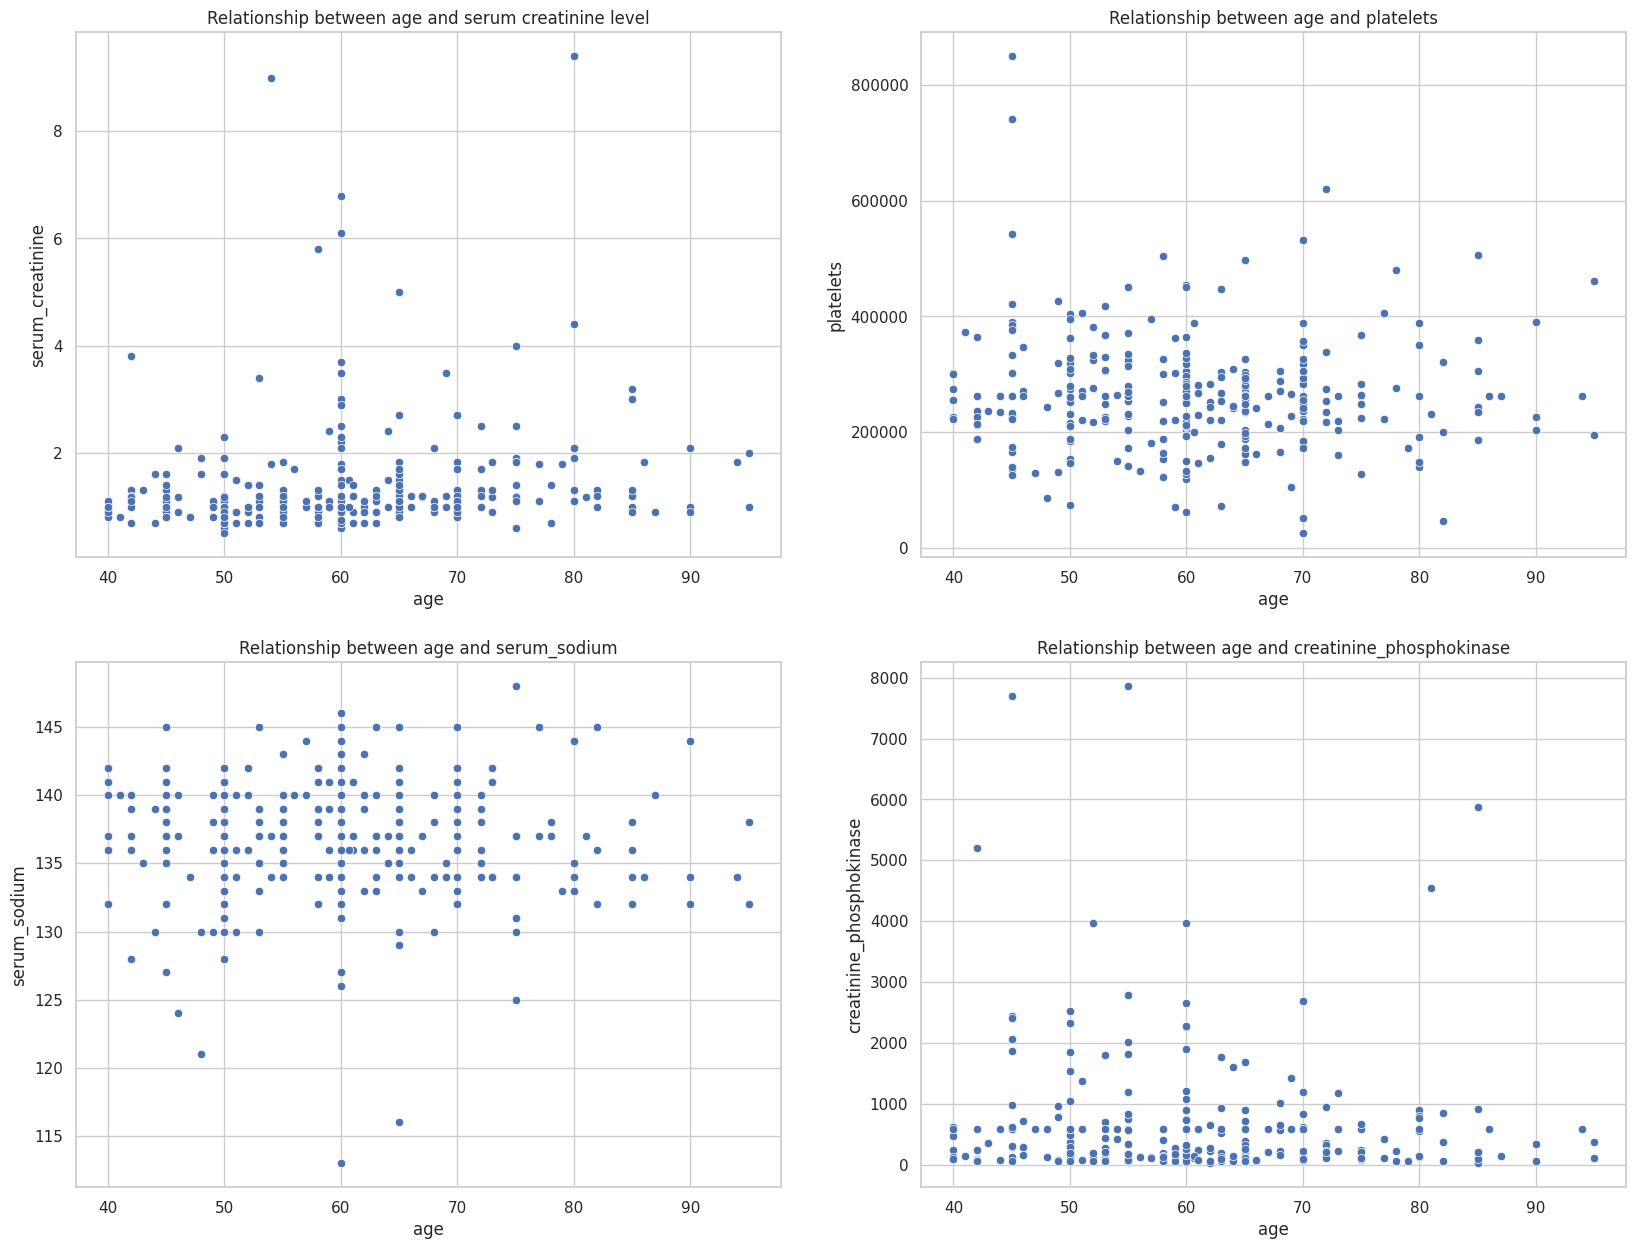

In [51]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "age",
                y = "serum_creatinine",  palette = "Reds_r",
                data = df_eda).set(title = 'Relationship between age and serum creatinine level');

sns.scatterplot(ax = axes[1],
                x = "age",
                y = "platelets", palette = "Reds_r",
                data = df_eda).set(title = 'Relationship between age and platelets');

sns.scatterplot(ax = axes[2],
                x = "age",
                y = "serum_sodium", palette = "Reds_r",
                data = df_eda).set(title = 'Relationship between age and serum_sodium');

sns.scatterplot(ax = axes[3],
                x = "age",
                y = "creatinine_phosphokinase",  palette = "Reds_r",
                data = df_eda).set(title = 'Relationship between age and creatinine_phosphokinase');

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    

As it can be seen there is not any correlation between the variables

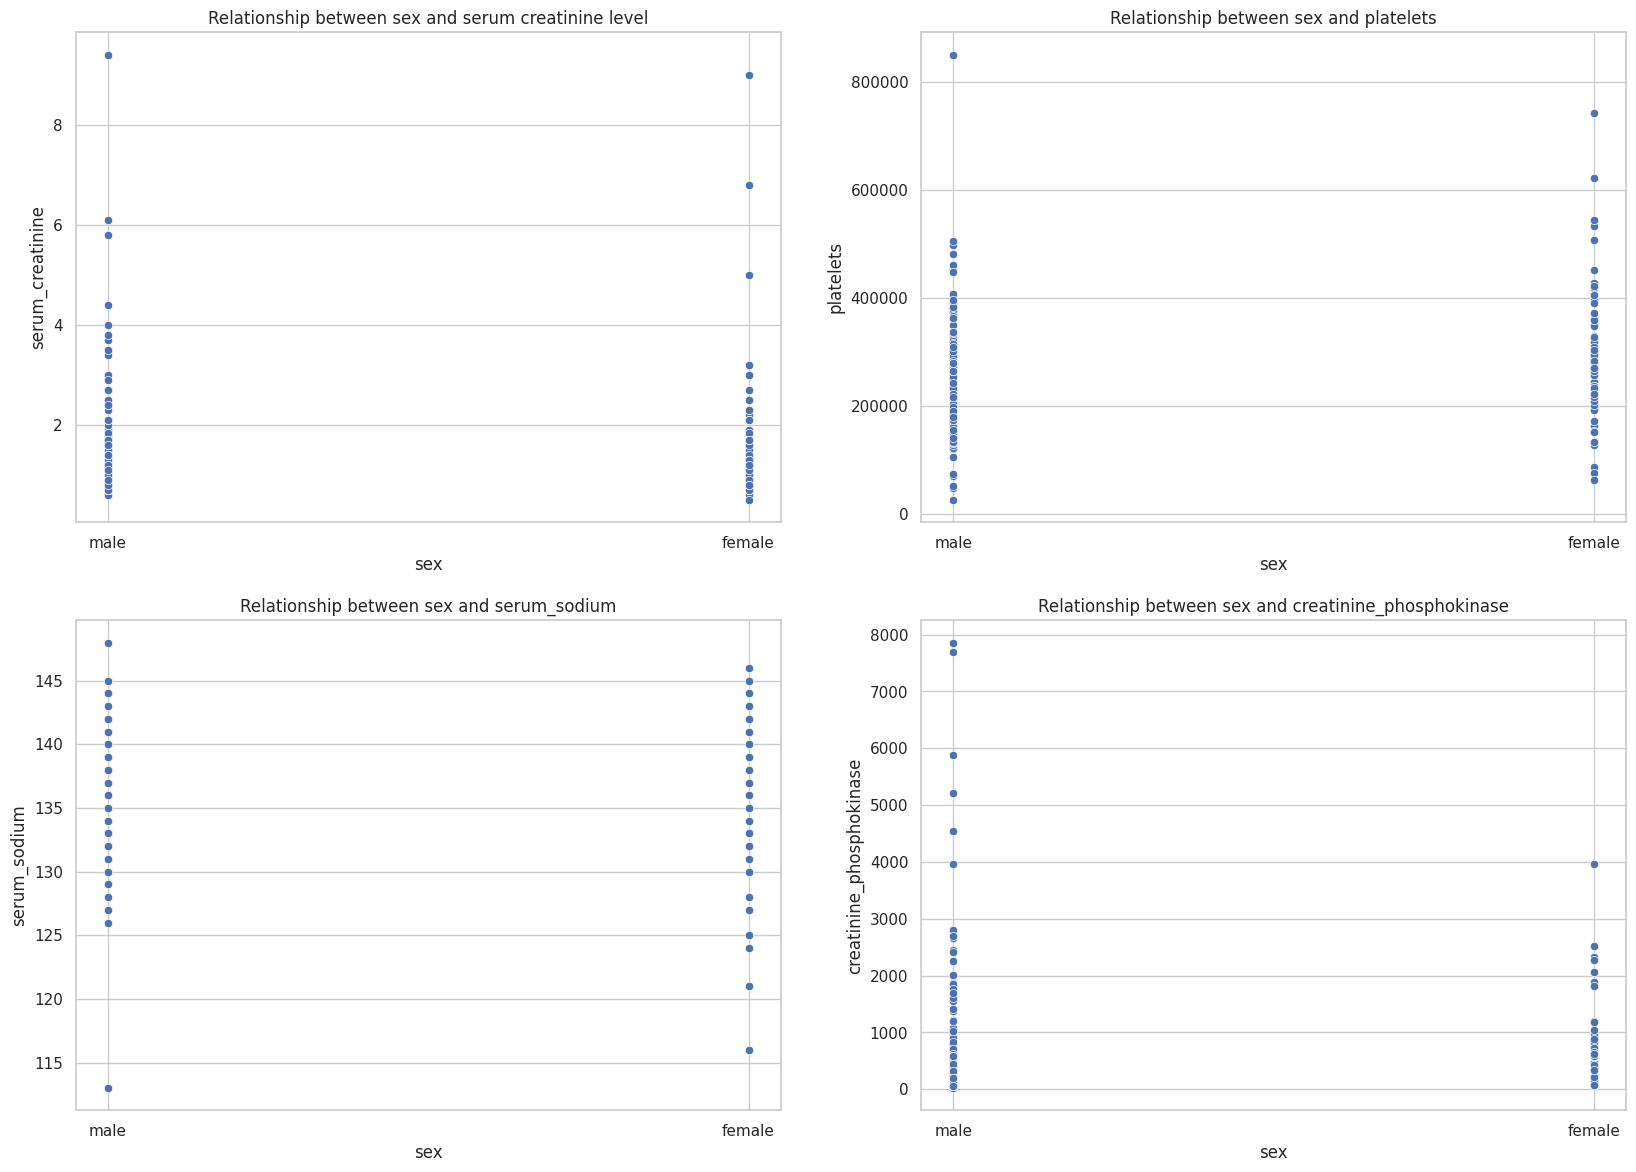

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "sex",
                y = "serum_creatinine",
                data = df_eda).set(title = 'Relationship between sex and serum creatinine level');

sns.scatterplot(ax = axes[1],
                x = "sex",
                y = "platelets",
                data = df_eda).set(title = 'Relationship between sex and platelets');

sns.scatterplot(ax = axes[2],
                x = "sex",
                y = "serum_sodium",
                data = df_eda).set(title = 'Relationship between sex and serum_sodium');

sns.scatterplot(ax = axes[3],
                x = "sex",
                y = "creatinine_phosphokinase",
                data = df_eda).set(title = 'Relationship between sex and creatinine_phosphokinase');

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
    

When we look at the graphs, we do not see a significant difference between the classes of the 'sex' variable according to the variables mentioned.

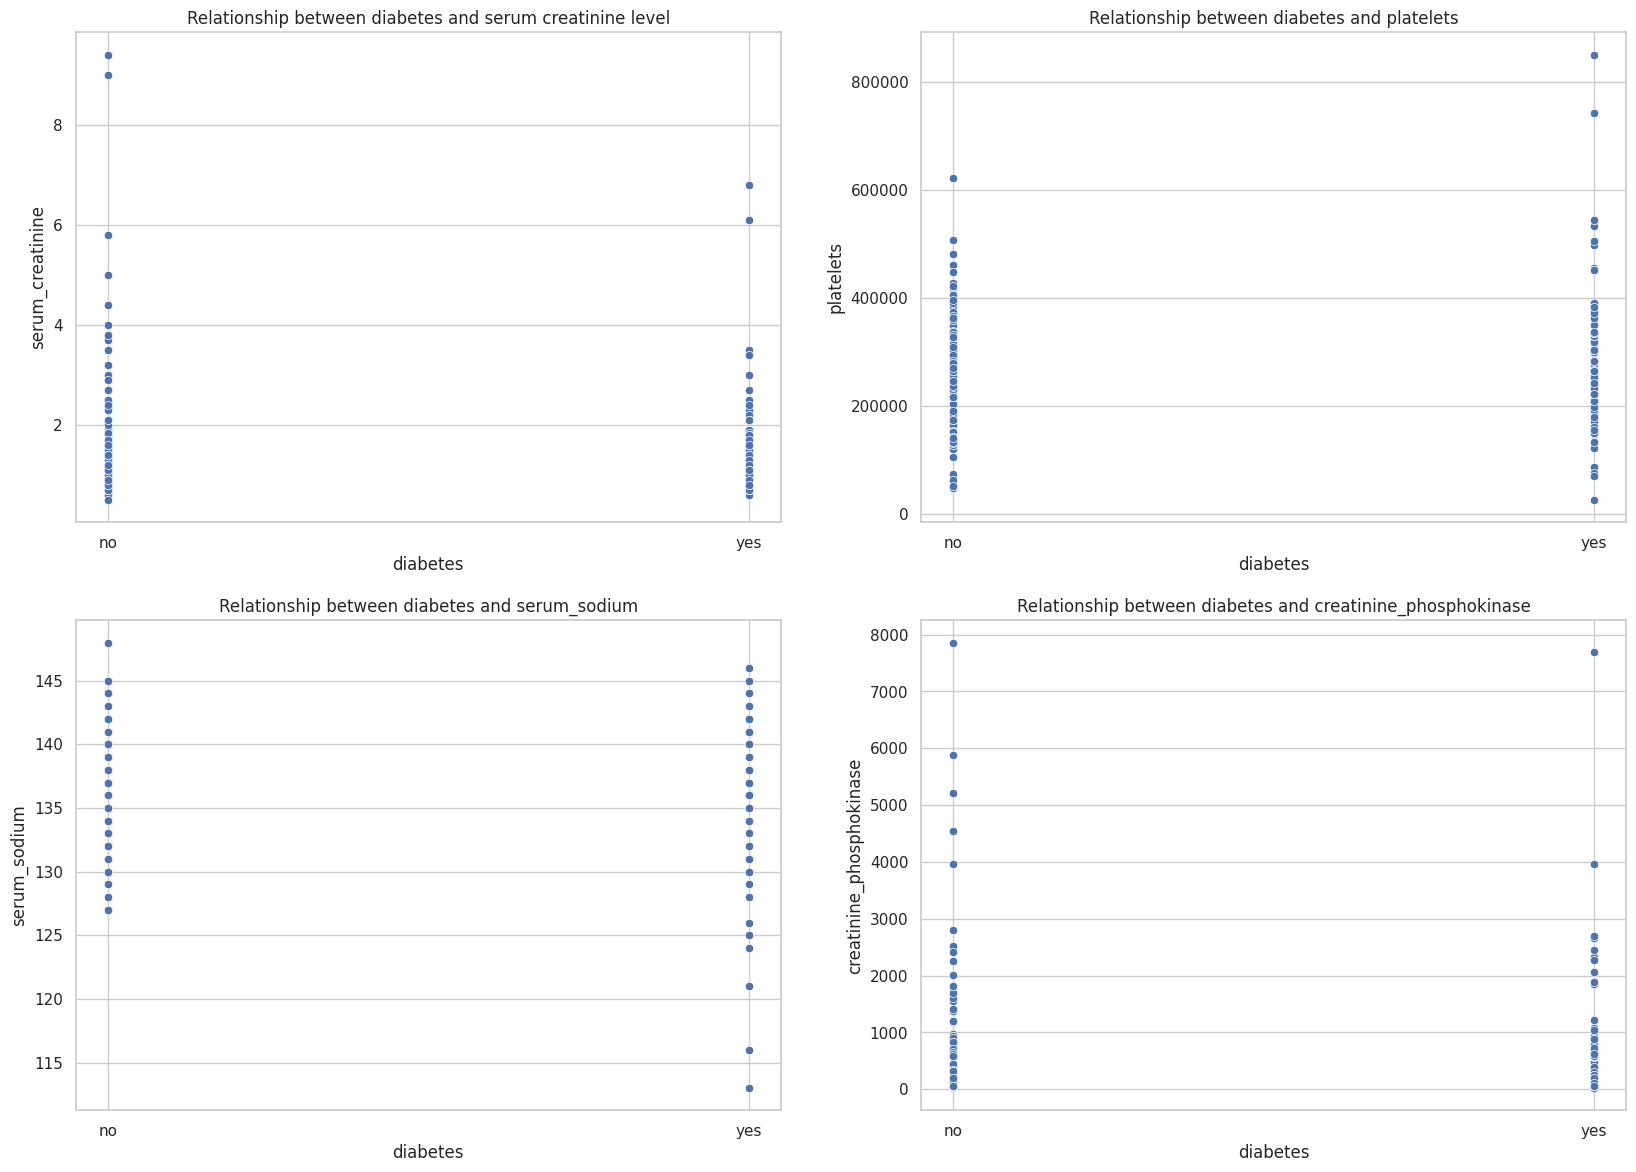

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "diabetes",
                y = "serum_creatinine",
                data = df_eda).set(title = 'Relationship between diabetes and serum creatinine level');

sns.scatterplot(ax = axes[1],
                x = "diabetes",
                y = "platelets",
                data = df_eda).set(title = 'Relationship between diabetes and platelets');

sns.scatterplot(ax = axes[2],
                x = "diabetes",
                y = "serum_sodium",
                data = df_eda).set(title = 'Relationship between diabetes and serum_sodium');

sns.scatterplot(ax = axes[3],
                x = "diabetes",
                y = "creatinine_phosphokinase",
                data = df_eda).set(title = 'Relationship between diabetes and creatinine_phosphokinase');

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  

    
When we look at the graphs, we do not see a significant difference between the classes of the 'diabetes' variable according to the variables mentioned.

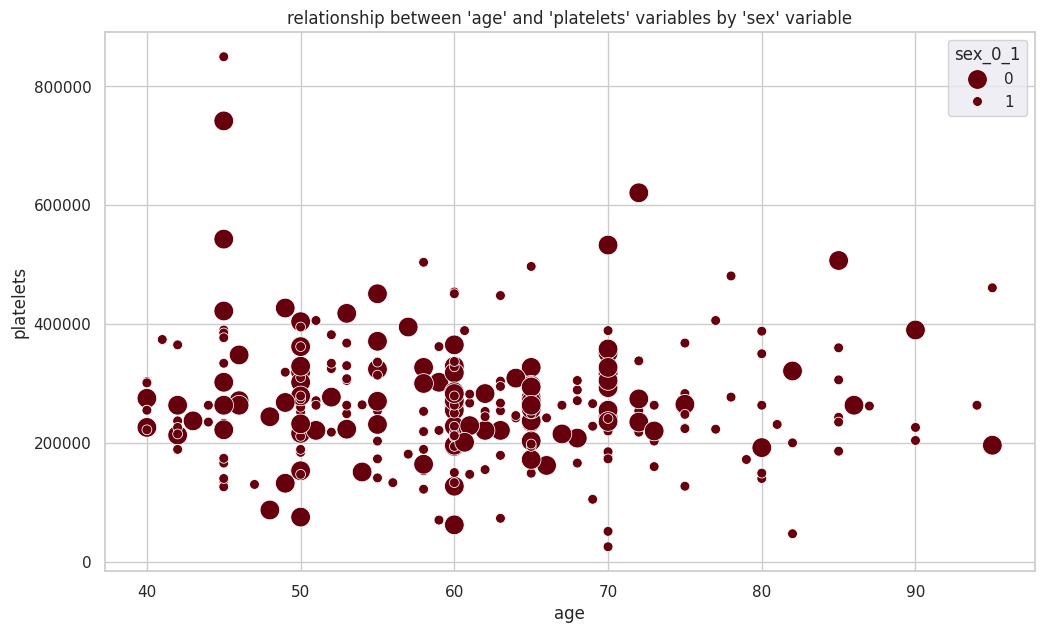

In [54]:
df_eda["sex_0_1"] = np.where(df_eda["sex"] == "male", 1, 0)

fig, axes = plt.subplots(figsize = (12, 7))

sns.set_theme(style = "darkgrid")

sns.scatterplot(data = df_eda, x = "age", y = "platelets", hue = "sex_0_1",
    palette = "Reds_r", size = "sex_0_1", sizes = (50, 200), hue_norm = (2, 8),
    legend="auto").set(title = "relationship between 'age' and 'platelets' variables by 'sex' variable");

<a id="5.6"></a>

#### <b>5.6 <span style='color:#FE6203'>|</span>Smooth Kernel Density with Marginal Histograms</b>

### Kernel density estimation

In statistics, kernel density estimation (KDE) is the application of kernel smoothing for probability density estimation, i.e., a non-parametric method to estimate the probability density function of a random variable based on kernels as weights. KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form. One of the famous applications of kernel density estimation is in estimating the class-conditional marginal densities of data when using a naive Bayes classifier, which can improve its prediction accuracy.

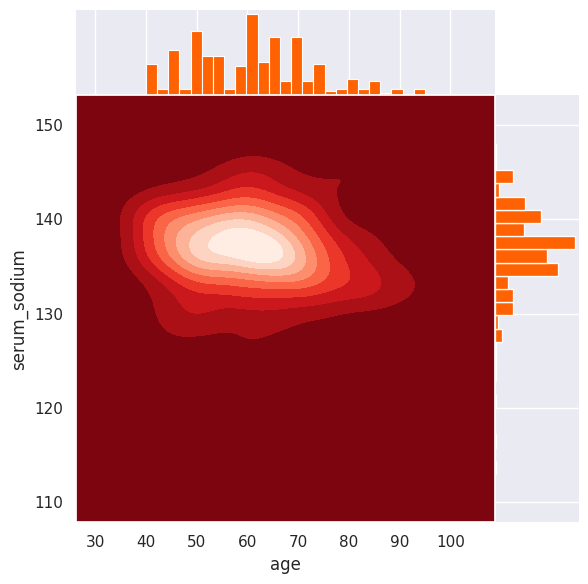

In [55]:
sns.set_theme(style = "darkgrid")
g = sns.JointGrid(data = df_eda, x = "age", y = "serum_sodium", space = 0)

g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "Reds_r")
g.plot_marginals(sns.histplot, color = "#FE6203", alpha = 1, bins = 25);

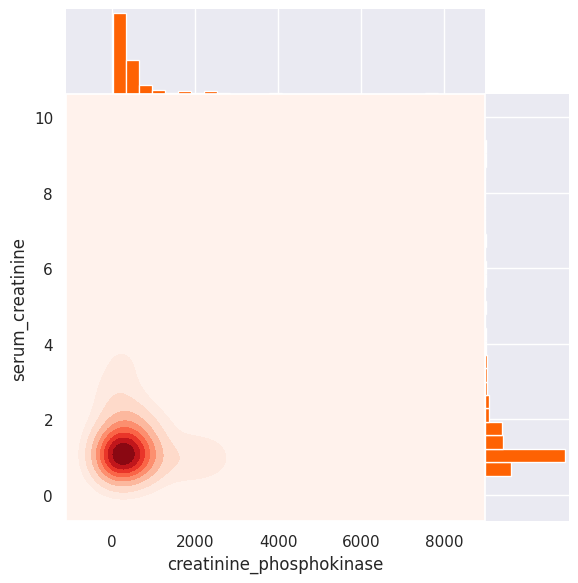

In [56]:
sns.set_theme(style = "darkgrid")
g = sns.JointGrid(data = df_eda, x = "creatinine_phosphokinase", y = "serum_creatinine", space = 0)

g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "Reds")
g.plot_marginals(sns.histplot, color = "#FE6203", alpha = 1, bins = 25);

<a id="5.7"></a>

#### <b>5.7 <span style='color:#FE6203'>|</span>Regplot and heatmap</b>

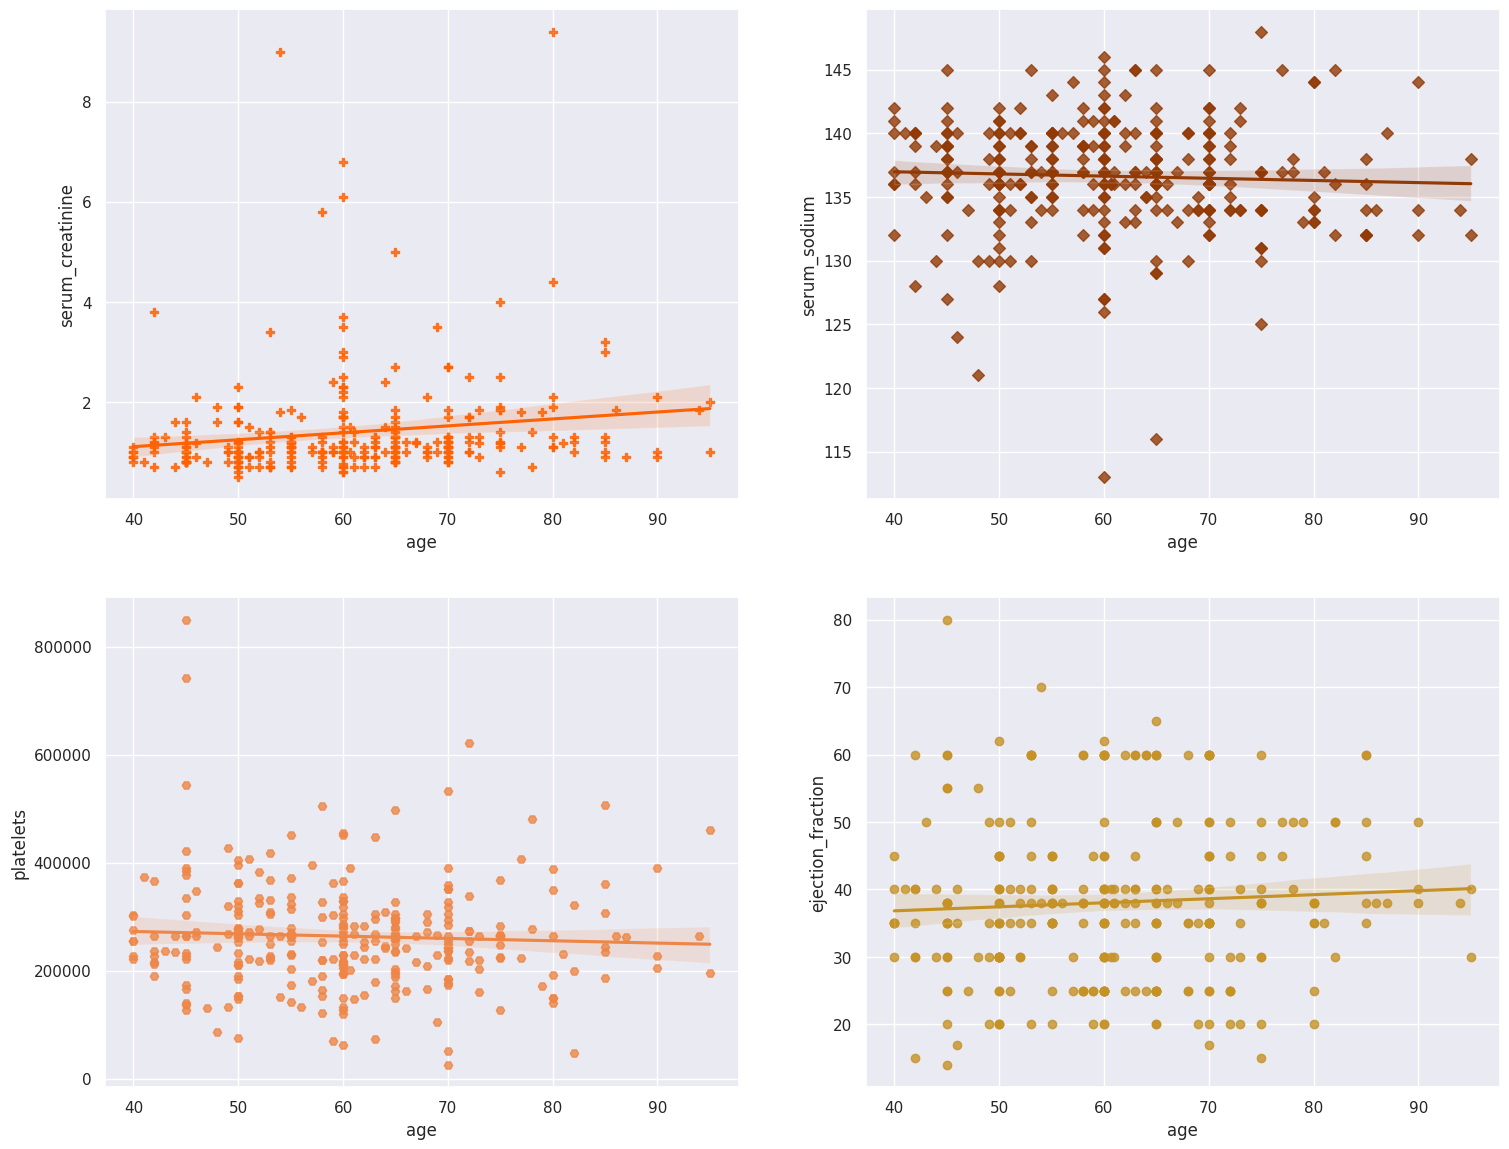

In [57]:
fig, axes = plt.subplots(2, 2, figsize = (18, 14))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "age", y = "serum_creatinine", data = df_eda, color = "#FE6203", marker = "P");
sns.regplot(ax = axes[1], x = "age", y = "serum_sodium", data = df_eda, color = "#913A06", marker = "D");
sns.regplot(ax = axes[2], x = "age", y = "platelets", data = df_eda, color = "#EE8647", marker = "H");
sns.regplot(ax = axes[3], x = "age", y = "ejection_fraction", data = df_eda, color = "#C59226", marker = "o");

<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  
From the graphs here, we do not observe any correlation between the variables

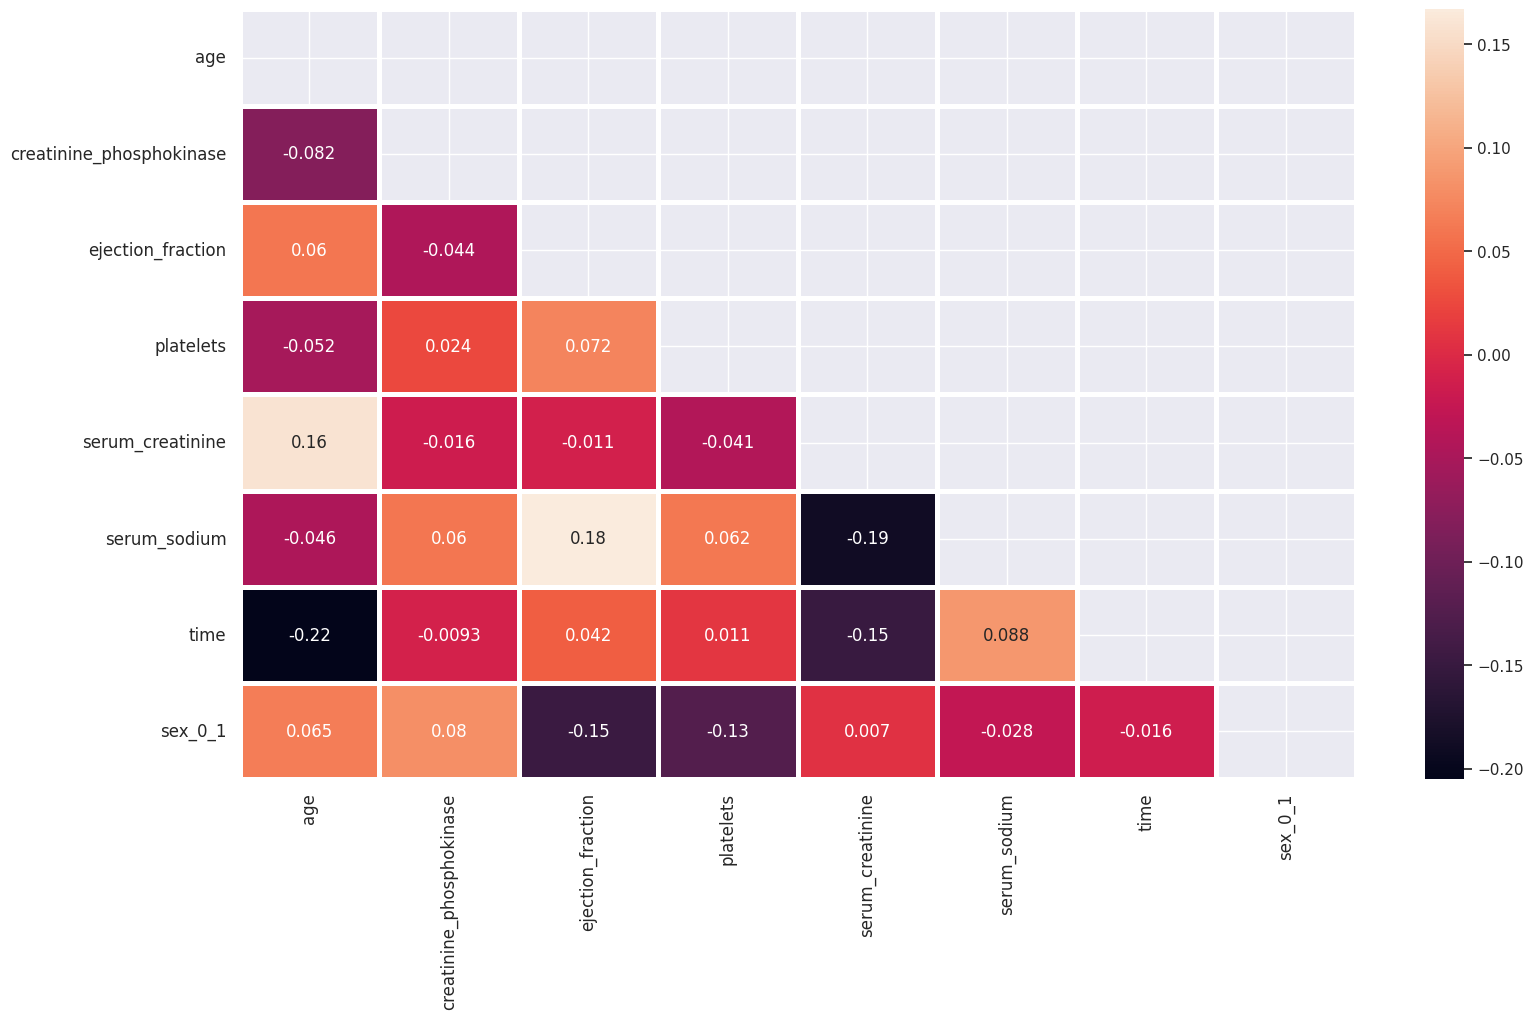

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_df = df_eda.select_dtypes(include=[np.number])

# Create a mask for the upper triangle of the correlation matrix
mask = np.zeros_like(numeric_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(numeric_df.corr(), mask=mask, annot=True, annot_kws={"size": 12}, robust=True, linewidths=2.5)
sns.set_style(style="darkgrid")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<div style="border-radius:10px;
            border : black solid;
            background-color: #F20707;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'></h4>  

From the heatmap above, we do not observe any correlation between the variables

<a id="5.8"></a>

#### <b>5.8 <span style='color:#FE6203'>|</span>Lmplot</b>

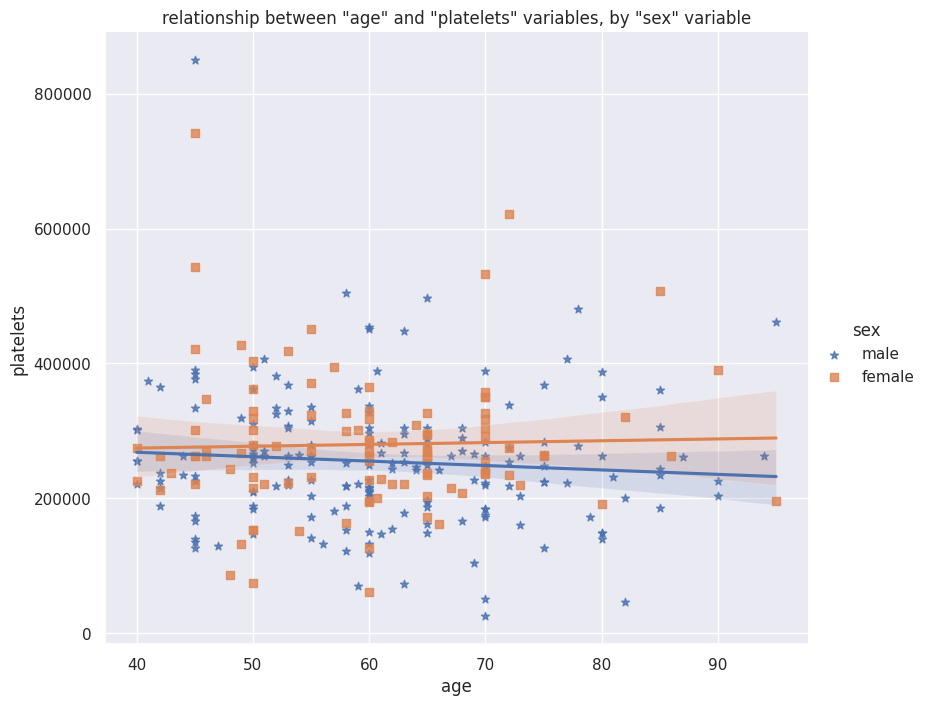

In [59]:
sns.lmplot(x = "age", y = "platelets", hue = "sex",
           height = 7, aspect = 1.2, markers = ["*", "s"],
           data = df_eda).set(title = 'relationship between "age" and "platelets" variables, by "sex" variable');

<a id="5.9"></a>

#### <b>5.9 <span style='color:#FE6203'>|</span>Hexagonal binning plot</b>

A hexagonal bin plot is created by covering the data range with a regular array of hexagons and coloring each hexagon according to the number of observations it covers. As with all bin plots, the hex-binned plots are good for visualizing large data sets for which a scatter plot would suffer from overplotting.


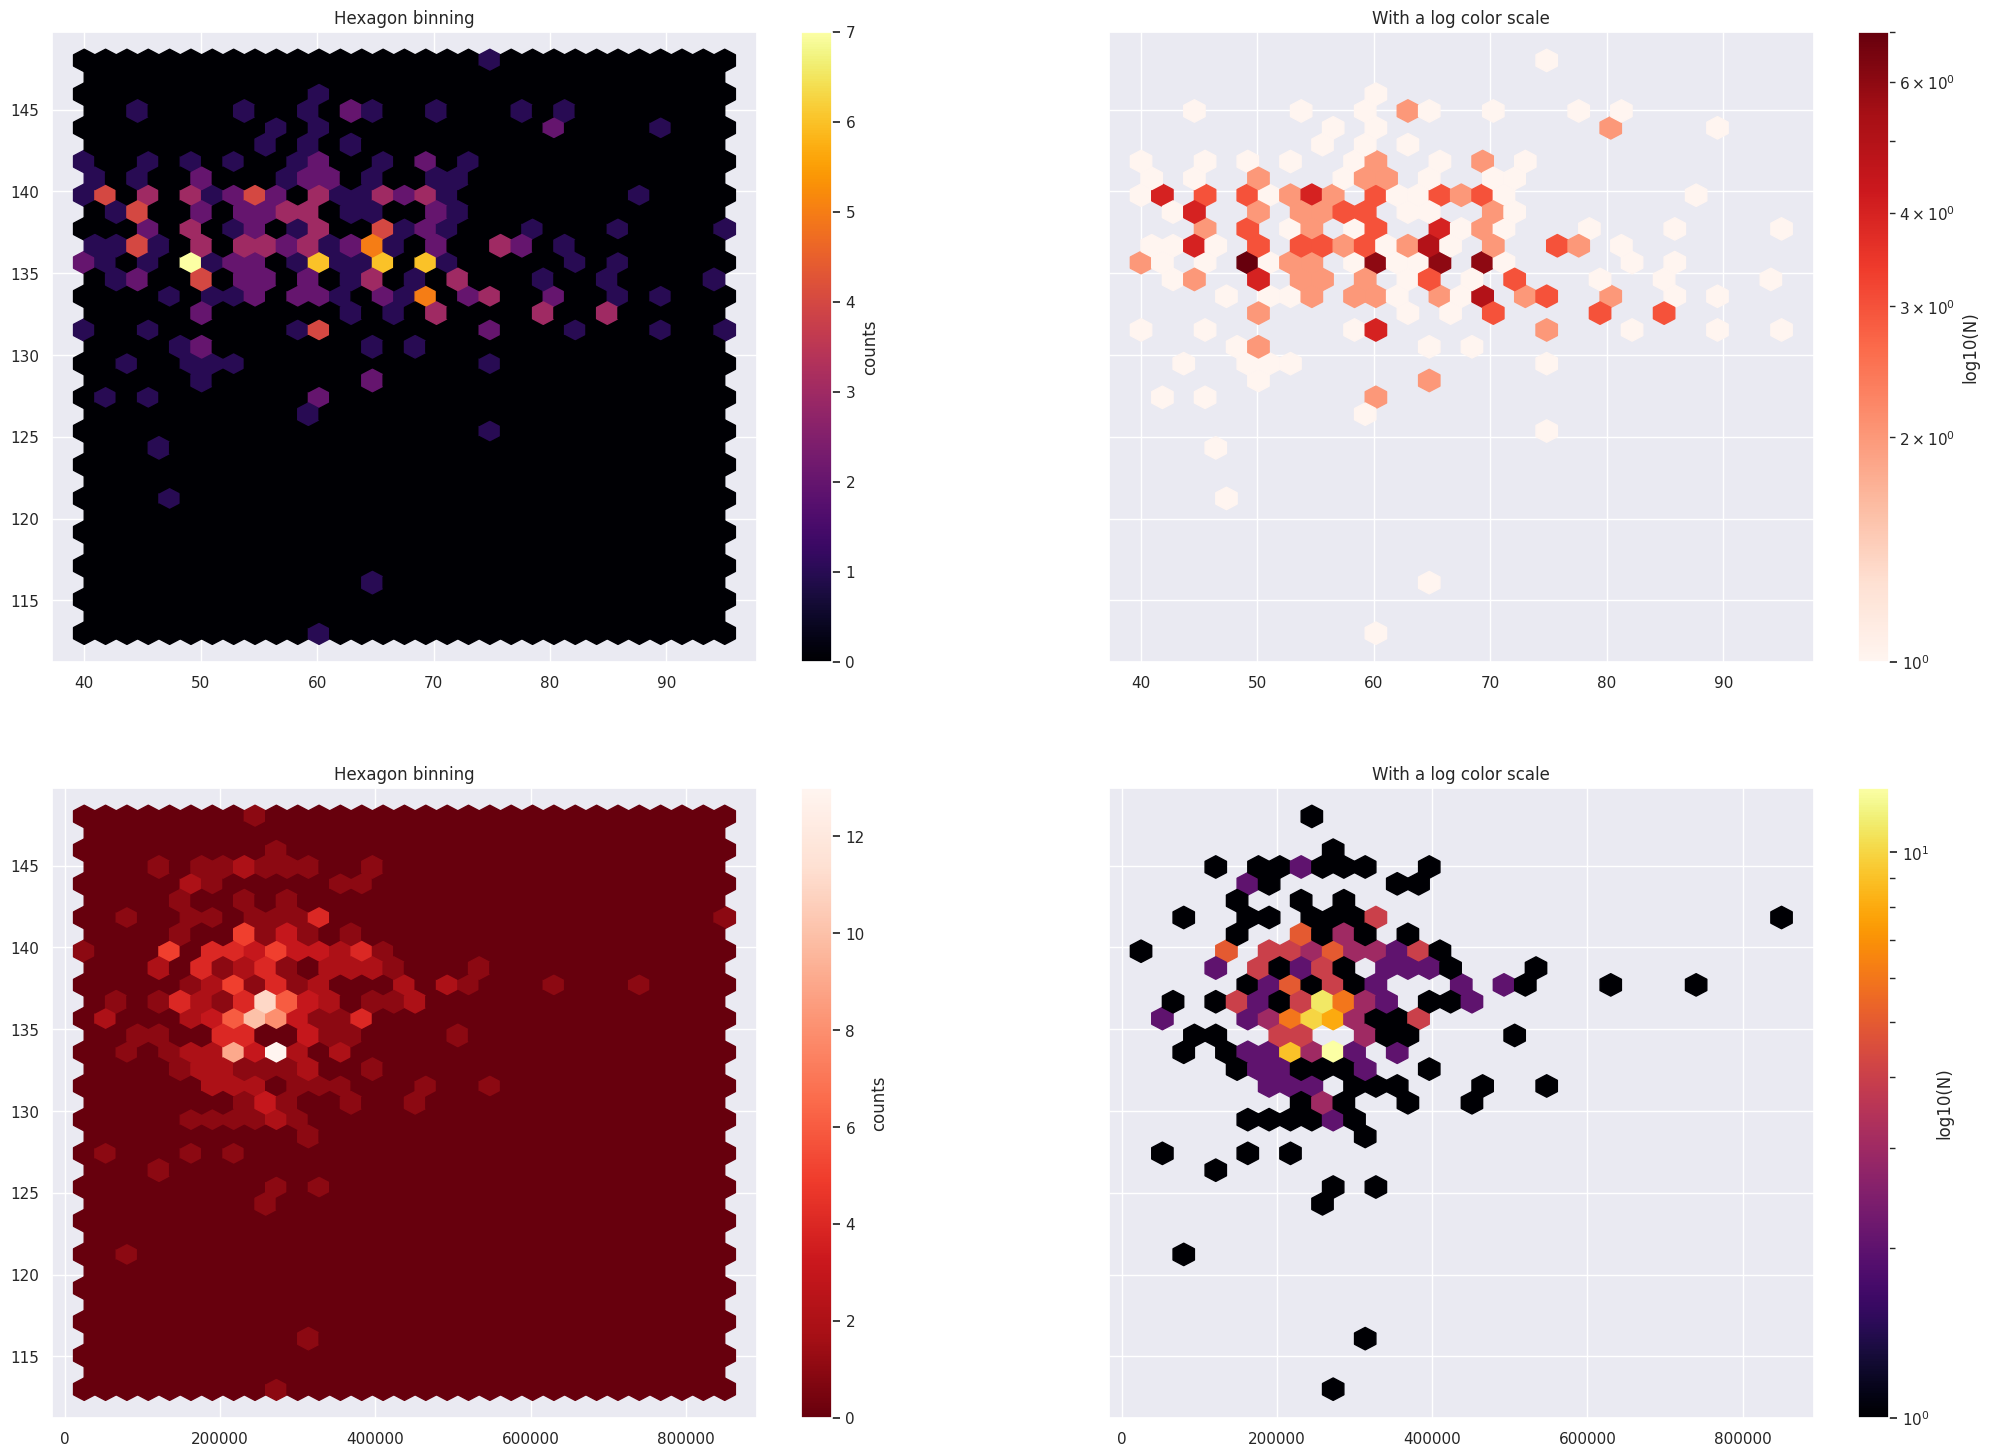

In [60]:
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows = 2,
                               ncols = 2,
                               sharey = True,
                               figsize = (25, 18))

hb = ax0.hexbin(df_eda["age"],
                df_eda["serum_sodium"],
                gridsize = 30,
                cmap = 'inferno')
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax0, label = 'counts')


hb = ax1.hexbin(df_eda["age"],
                df_eda["serum_sodium"],
                gridsize = 30,
                bins = 'log',
                cmap = 'Reds')
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax1, label = 'log10(N)')


hb = ax2.hexbin(df_eda["platelets"],
                df_eda["serum_sodium"],
                gridsize = 30,
                cmap = 'Reds_r')
ax2.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax2, label = 'counts')

hb = ax3.hexbin(df_eda["platelets"],
                df_eda["serum_sodium"],
                gridsize = 30,
                bins = 'log',
                cmap = 'inferno')
ax3.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax3, label = 'log10(N)')


plt.show()

<a id="5.10"></a>

#### <b>5.10 <span style='color:#FE6203'>|</span>2D Histogram</b>

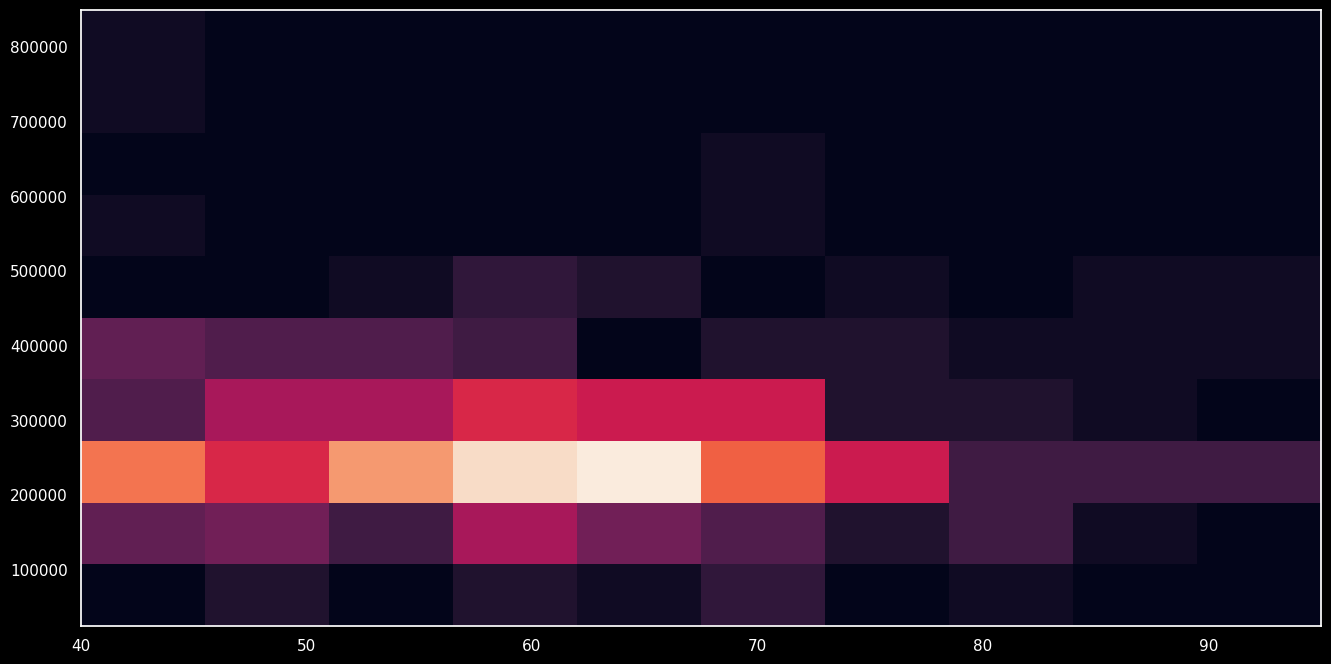

In [61]:
#print(plt.style.available) # various styles
plt.style.use('dark_background')

x = df_eda["age"]
y = df_eda["platelets"]

# plot:
fig, ax = plt.subplots(figsize = (16, 8))

ax.hist2d(x, y, density = True)

plt.show()

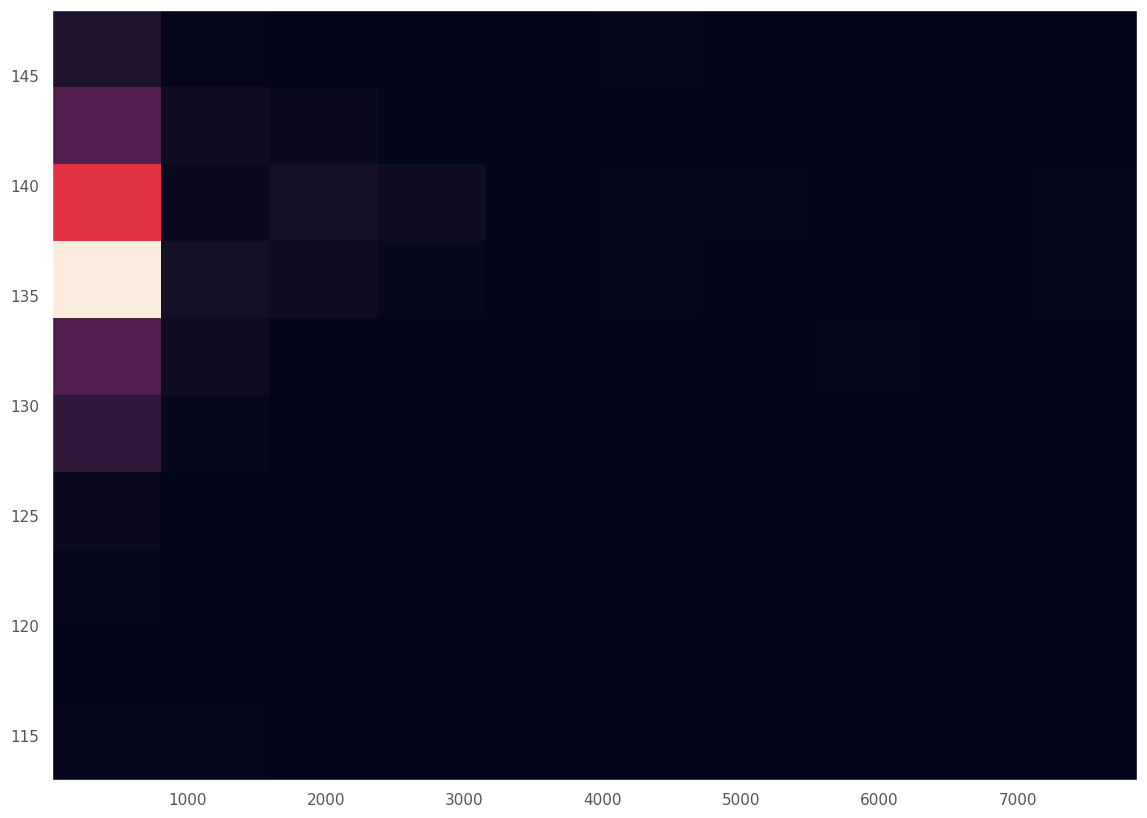

In [62]:
plt.style.use('ggplot')

x = df_eda["creatinine_phosphokinase"]
y = df_eda["serum_sodium"]

# plot:
fig, ax = plt.subplots(figsize = (14, 10))

ax.hist2d(x, y, density = True)

plt.show()

<a id="5.11"></a>

#### <b>5.11 <span style='color:#FE6203'>|</span>Pandas Crosstab</b>

<Axes: ylabel='Density'>

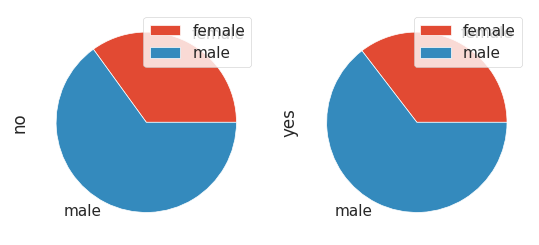

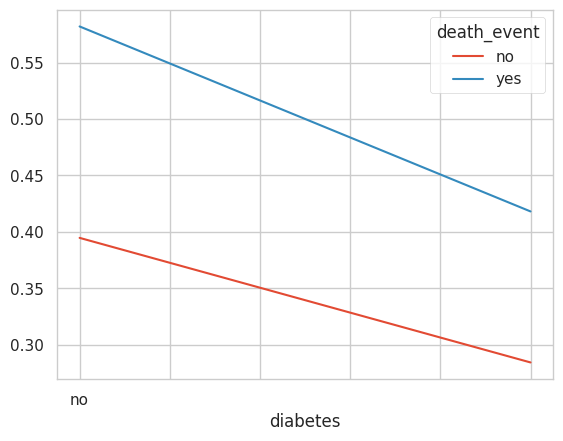

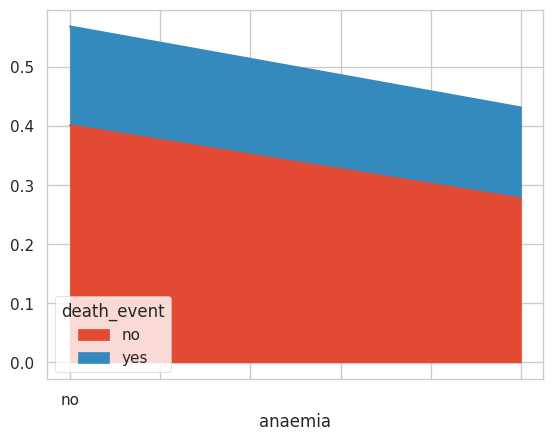

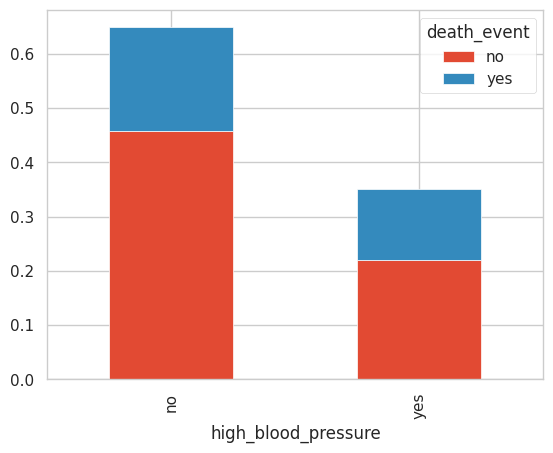

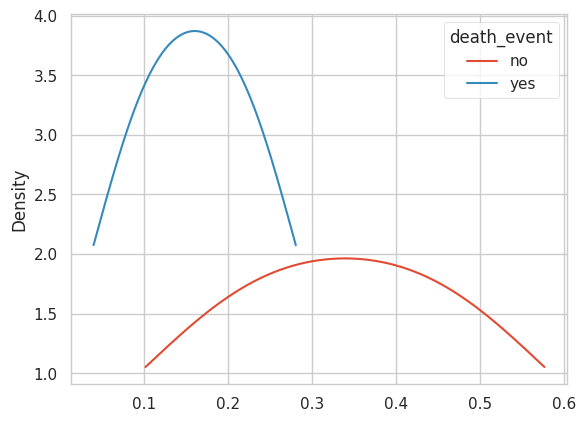

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use Seaborn's style
sns.set_style("whitegrid")

# Your plotting code
pd.crosstab(df_eda['sex'], df_eda['death_event'], normalize=True).plot(kind="pie", subplots=True, stacked=True)
pd.crosstab(df_eda['diabetes'], df_eda['death_event'], normalize=True).plot(kind="line", stacked=True)
pd.crosstab(df_eda['anaemia'], df_eda['death_event'], normalize=True).plot(kind="area", stacked=True)
pd.crosstab(df_eda['high_blood_pressure'], df_eda['death_event'], normalize=True).plot(kind="bar", stacked=True)
pd.crosstab(df_eda['smoking'], df_eda['death_event'], normalize=True).plot(kind="kde", stacked=True)



<a id="5.12"></a>

#### <b>5.12 <span style='color:#FE6203'>|</span>Lineplot</b>

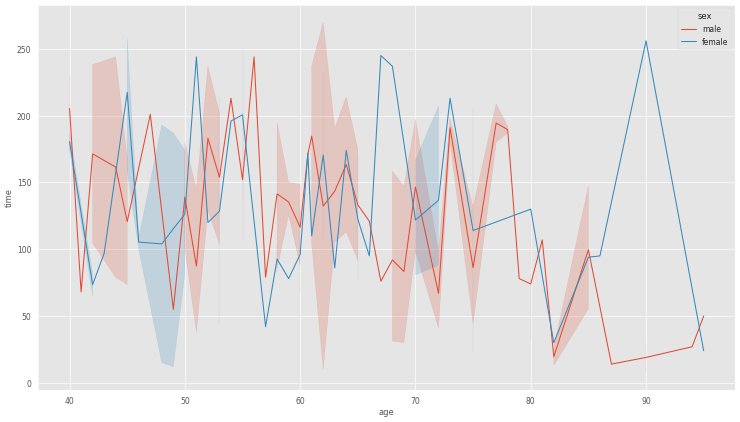

In [64]:
plt.figure(figsize = (18, 10), dpi = 50)
plt.style.use('ggplot')
sns.lineplot(data = df_eda, x = "age", y = "time", hue = "sex" );

<a id="6"></a>

## <b>6<span style='color:#FE6203'>|</span>DATASET PREPROCESSING</b>

# <h1 style="font-family: Sans-Serif; padding: 19px; font-size: 40px; color: #F20707; text-align: center; line-height: 1.9;"><b>PREPROCESS THE DATASET</b><br><span style = "color: #CD2DE0; font-size:25px"></span></h1>
<hr>

<a id="6.1"></a>

#### <b>6.1 <span style='color:#FE6203'>|</span>Look at Dataset</b>

In [17]:
df.head().style.background_gradient(cmap = "Reds_r")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1


<a id="6.2"></a>

#### <b>6.2 <span style='color:#FE6203'>|</span>Select Dependent and Independent Variables</b>

In [18]:
# we select dependent variable (label)
y = df["DEATH_EVENT"]

# we select independent variable
x = df.drop("DEATH_EVENT", axis = 1)

print(colored("\n DEPENDENT AND INDEPENDENT VARIABLES WERE SUCCESFULLY SELECTED...", color = "green", attrs = ["bold", "dark"]))


 DEPENDENT AND INDEPENDENT VARIABLES WERE SUCCESFULLY SELECTED...


<a id="6.3"></a>

#### <b>6.3 <span style='color:#FE6203'>|</span>Split Dataset into Train and Test Sets</b>

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

print(colored("\n THE DATASET WERE SUCCESFULLY SPLITTED - test = 20%, train = 80%...", color = "green", attrs = ["bold", "dark"]))


 THE DATASET WERE SUCCESFULLY SPLITTED - test = 20%, train = 80%...


<a id="6.4"></a>

#### <b>6.4 <span style='color:#FE6203'>|</span>Standardization</b>



Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(colored("\n x_train AND x_test SETS WERE SUCCESFULLY STANDARIZED", color = "green", attrs = ["bold", "dark"]))


 x_train AND x_test SETS WERE SUCCESFULLY STANDARIZED


In [21]:
x_train[0:5]

array([[-1.33194278,  1.11069566, -0.4576634 , -0.84818893, -0.24318058,
        -0.72269841, -0.89319445, -0.58084862,  0.51465589,  0.72941845,
         1.52297224, -0.10575054],
       [-0.4999137 , -0.90033664, -0.51894319, -0.84818893,  0.17737049,
        -0.72269841, -0.57954879, -0.39670905,  0.29500811,  0.72941845,
        -0.65661079,  1.33189826],
       [ 0.58172409,  1.11069566,  0.39546617,  1.17898261, -0.24318058,
        -0.72269841,  0.15589621, -0.30463927, -0.58358301,  0.72941845,
        -0.65661079,  0.86979686],
       [-0.08389917,  1.11069566, -0.02487488, -0.84818893, -0.66373165,
         1.38370306, -1.40151673, -0.48877884,  1.83254257, -1.37095517,
        -0.65661079, -0.43949044],
       [-0.08389917, -0.90033664, -0.35712624,  1.17898261,  0.00915007,
        -0.72269841,  0.78318753,  1.44468663,  1.17359923, -1.37095517,
        -0.65661079, -1.27384019]])

In [22]:
x_test[0:5]

array([[-0.91592824,  1.11069566, -0.47202585, -0.84818893, -1.5048338 ,
        -0.72269841, -0.73096394, -0.58084862,  0.51465589,  0.72941845,
        -0.65661079,  0.21515321],
       [-1.33194278, -0.90033664, -0.02487488,  1.17898261,  1.43902371,
        -0.72269841,  3.09767621, -0.39670905, -1.02287857, -1.37095517,
        -0.65661079,  1.55011281],
       [-0.66631952,  1.11069566, -0.49500577, -0.84818893, -1.5048338 ,
         1.38370306,  1.74575525, -0.02842992,  0.51465589, -1.37095517,
        -0.65661079, -1.10697024],
       [-0.74952242, -0.90033664, -0.4557484 , -0.84818893, -0.66373165,
        -0.72269841, -0.41731828, -0.67291841, -0.14428745,  0.72941845,
         1.52297224, -0.22127589],
       [ 0.33211537,  1.11069566, -0.45287591, -0.84818893, -0.24318058,
         1.38370306,  0.36138819, -0.58084862, -0.58358301,  0.72941845,
        -0.65661079,  0.83128841]])

<a id="7"></a>

## <b>7<span style='color:#F20707'>|</span>BUILDING CLASSIFICATION MODELS</b>

# <h1 style="font-family: Sans-Serif; padding: 19px; font-size: 40px; color: #F20707; text-align: center; line-height: 1.9;"><b>CREATE MACHINE LEARNING MODELS</b><br><span style = "color: #CD2DE0; font-size:25px"></span></h1>
<hr>

<a id="7.1"></a>

#### <b>7.1 <span style='color:#F20707'>|</span>Random Forests Model</b>



Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance. The first algorithm for random decision forests was created in 1995 by Tin Kam Ho using the random subspace method, which, in Ho's formulation, is a way to implement the "stochastic discrimination" approach to classification proposed by Eugene Kleinberg. An extension of the algorithm was developed by Leo Breiman and Adele Cutler, who registered "Random Forests" as a trademark in 2006 (as of 2019, owned by Minitab, Inc.). The extension combines Breiman's "bagging" idea and random selection of features, introduced first by Ho and later independently by Amit and Geman in order to construct a collection of decision trees with controlled variance. Random forests are frequently used as "blackbox" models in businesses, as they generate reasonable predictions across a wide range of data while requiring little configuration.</mark>**


In [23]:
rf = RandomForestClassifier()

<a id="7.2"></a>

#### <b>7.2 <span style='color:#F20707'>|</span>Hyperparameter Tuning</b>

In [24]:
#parametres for search
rf_params = {"max_depth": [3, 5, 8, 10],
             "max_features": [3, 5, 8, 10],
             "n_estimators": [10, 500, 1000],
             "min_samples_split": [2, 5, 10]}

# Search the best parametres with GridSearchCV() function
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10],
                         'max_features': [3, 5, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

<a id="7.3"></a>

#### <b>7.3 <span style='color:#F20707'>|</span>Get Best Parameters</b>

In [25]:
# get the best parametres

rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 10,
 'n_estimators': 1000}

<a id="7.4"></a>

#### <b>7.4 <span style='color:#F20707'>|</span>Build Model with Best Parameters</b>

In [26]:
rf_model = RandomForestClassifier(n_estimators = rf_cv_model.best_params_["n_estimators"],
                                max_depth = rf_cv_model.best_params_["max_depth"],
                                max_features = rf_cv_model.best_params_["max_features"],
                                min_samples_split = rf_cv_model.best_params_["min_samples_split"])
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=1000, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

<a id="7.5"></a>

#### <b>7.5 <span style='color:#F20707'>|</span>Accuracy Score of Model on Test Set</b>

In [27]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

<a id="7.6"></a>

#### <b>7.6 <span style='color:#F20707'>|</span>Importance Levels of the Variables</b>

Text(0, 0.5, 'Variables')

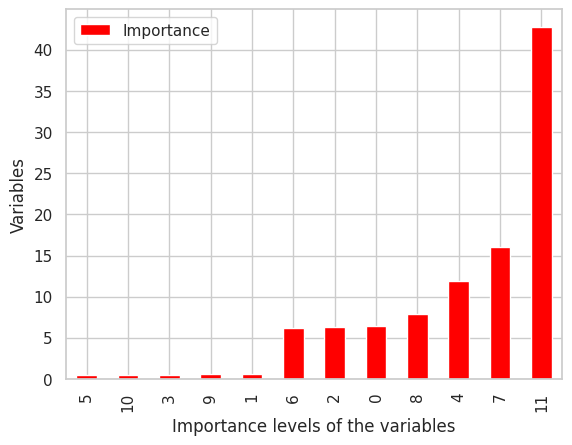

In [28]:
importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100},
                         index = pd.DataFrame(x_train).columns)
importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "bar", color = "red")
plt.xlabel("Importance levels of the variables")
plt.ylabel("Variables")

<a id="7.7"></a>

#### <b>7.7 <span style='color:#F20707'>|</span>Classification Report</b>

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



<a id="7.8"></a>

#### <b>7.8 <span style='color:#F20707'>|</span>ROC AUC - Random Forests</b>

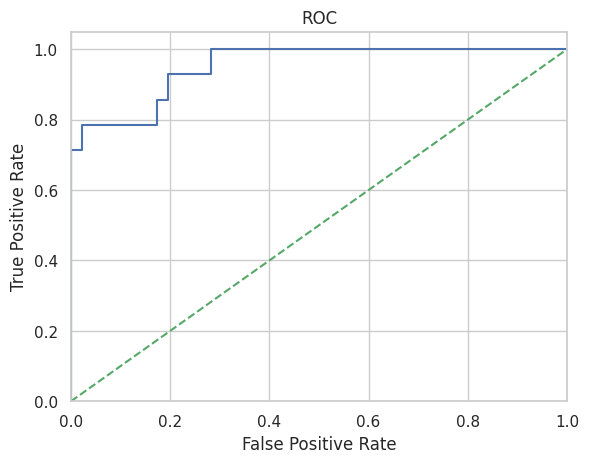

In [30]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

<a id="7.9"></a>

#### <b>7.9 <span style='color:#F20707'>|</span>Confusion Matrix Visualization</b>

[[45  1]
 [ 3 11]]


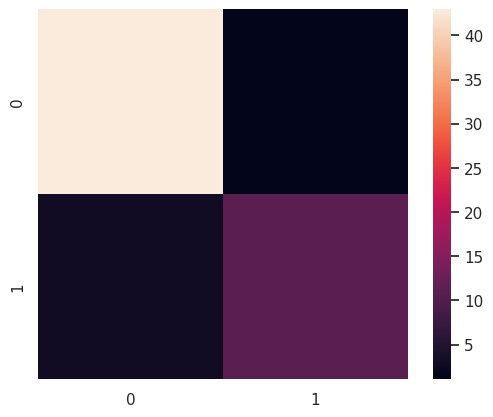

In [31]:
# Visualization Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat, square = True, robust = True)
plt.show()

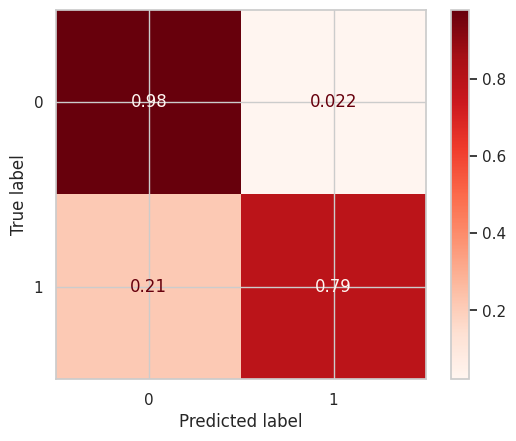

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix with normalization
cm = confusion_matrix(y_test, rf_model.predict(x_test), normalize='true')

# Create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the confusion matrix with the 'Reds' colormap
disp.plot(cmap=plt.cm.Reds)

plt.show()


<a id="7.10"></a>

#### <b>7.10 <span style='color:#F20707'>|</span>Logistic Regression</b>

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds - that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

In this logistic regression equation, logit(pi) is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. The Hosmer–Lemeshow test is a popular method to assess model fit.


In [33]:
# build a model

log = LogisticRegression(solver = "liblinear")
log_model = log.fit(x_train, y_train)
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='deprecated', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<a id="7.11"></a>

#### <b>7.11 <span style='color:#F20707'>|</span>Accuracy Score of Model on Test Set</b>

In [35]:
y_pred = log_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8833333333333333

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



[[43  3]
 [ 4 10]]


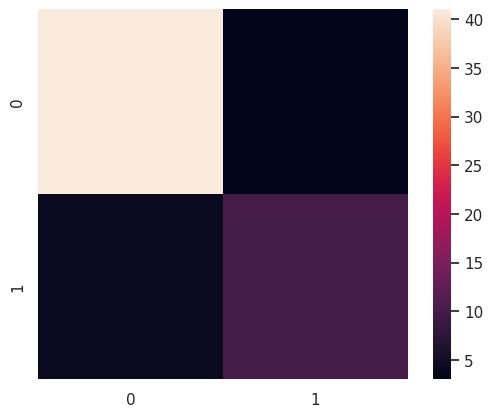

In [36]:
# Visualization Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat, square = True, robust = True)
plt.show()

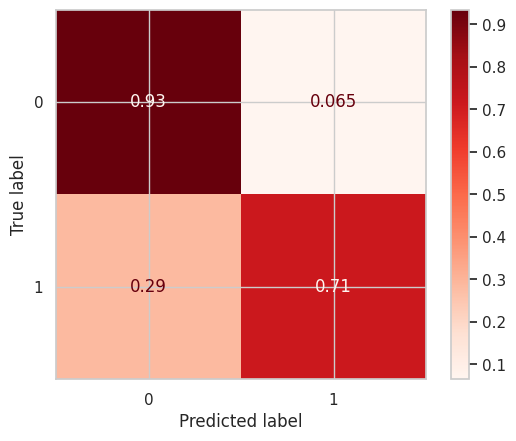

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix with normalization
cm = confusion_matrix(y_test, log_model.predict(x_test), normalize='true')

# Create the display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Display the confusion matrix with the 'Reds' colormap
disp.plot(cmap=plt.cm.Reds)

plt.show()


<a id="7.12"></a>

#### <b>7.12 <span style='color:#F20707'>|</span>ROC AUC - Logistic Regression</b>

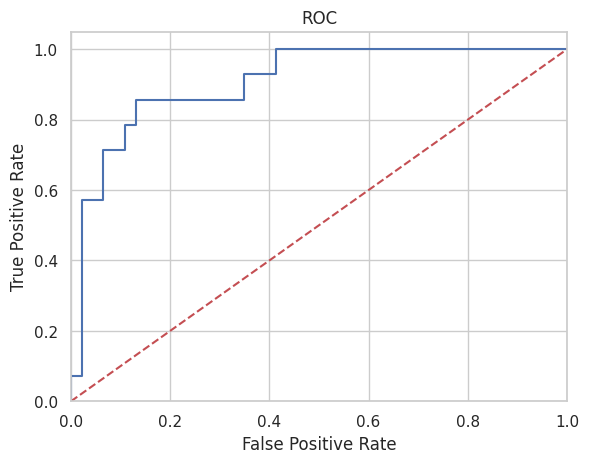

In [39]:
log_roc_auc = roc_auc_score(y_test, log_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()